# 5.  Australia 'Data' Salary Position Level Analysis

In [1]:
# import necessary packages
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

style.use('ggplot')


C:\Users\tzechiang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# read in the data that has been scraped and cleaned
dummy = pd.read_csv('./datasets/dummy_stem.csv')

In [3]:
dummy.shape

(1396, 39)

In [4]:
dummy.head(2)

Unnamed: 0  salary     title_cat  position_lvl  \
0           0       0  Data Analyst            -1   
1           1       0  Data Analyst            -1   

   c_Administration & Office Support  c_Advertising, Arts & Media  \
0                                  0                            0   
1                                  0                            0   

   c_Banking & Financial Services  c_CEO & General Management  \
0                               0                           0   
1                               0                           0   

   c_Call Centre & Customer Service  c_Community Services & Development  \
0                                 0                                   0   
1                                 0                                   0   

                         ...                          c_Sport & Recreation  \
0                        ...                                             0   
1                        ...                                             0   

   c_Trades & Services  s_NSW  s_NT  s_QLD  s_SA  s_TAS  s_VIC  s_WA  \
0                    0      1     0      0     0      0      0     0   
1                    0      0     0      1     0      0      0     0   

                                                stem  
0  the global transit depart is respons for the p...  
1  I m look to speak to mid to senior level data ...  

[2 rows x 39 columns]

In [5]:
# drop ['Unnamed: 0'] columns
dummy.drop(columns = ['Unnamed: 0'], inplace=True)

In [6]:
dummy.position_lvl.nunique()

3

In [7]:
value_counts = dummy['position_lvl'].value_counts()
value_counts
# for the sake of simplicity - remove all 1 that are not senior or junior

-1    1065
 1     288
 0      43
Name: position_lvl, dtype: int64

In [8]:
row_mask = dummy[dummy['position_lvl']== -1]
dummy.drop(row_mask.index, inplace=True)

In [9]:
dummy.isnull().sum().sum()

1

In [10]:
dummy.dropna(inplace=True)

In [11]:
dummy.isnull().sum().sum()

0

In [12]:
dummy.shape

(330, 38)

Create and compare at least two models for each section. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).

Section 1: Job Salary Trends
Section 2: Job Category Factors

## Set tup the Target and Predictors

Target is what I want to predict using Predictors 

In [13]:
dummy.columns

Index(['salary', 'title_cat', 'position_lvl',
       'c_Administration & Office Support', 'c_Advertising, Arts & Media',
       'c_Banking & Financial Services', 'c_CEO & General Management',
       'c_Call Centre & Customer Service',
       'c_Community Services & Development', 'c_Construction',
       'c_Consulting & Strategy', 'c_Design & Architecture',
       'c_Education & Training', 'c_Engineering',
       'c_Farming, Animals & Conservation', 'c_Government & Defence',
       'c_Healthcare & Medical', 'c_Hospitality & Tourism',
       'c_Human Resources & Recruitment',
       'c_Information & Communication Technology', 'c_Legal',
       'c_Manufacturing, Transport & Logistics',
       'c_Marketing & Communications', 'c_Mining, Resources & Energy',
       'c_Real Estate & Property', 'c_Retail & Consumer Products', 'c_Sales',
       'c_Science & Technology', 'c_Sport & Recreation', 'c_Trades & Services',
       's_NSW', 's_NT', 's_QLD', 's_SA', 's_TAS', 's_VIC', 's_WA', 'stem'],
   

In [14]:
dummy['salary'].nunique()

2

## Select Target and Predictors

In [15]:
# Target: Job Salary Trends
y = dummy['position_lvl']

# Features/Predictor:
X = dummy.drop(columns=['title_cat', 'position_lvl'])
X.head(2)

salary  c_Administration & Office Support  c_Advertising, Arts & Media  \
4       0                                  0                            0   
7       0                                  0                            0   

   c_Banking & Financial Services  c_CEO & General Management  \
4                               0                           0   
7                               0                           0   

   c_Call Centre & Customer Service  c_Community Services & Development  \
4                                 0                                   0   
7                                 0                                   0   

   c_Construction  c_Consulting & Strategy  c_Design & Architecture  \
4               0                        0                        0   
7               0                        0                        0   

                         ...                          c_Sport & Recreation  \
4                        ...                                             0   
7                        ...                                             0   

   c_Trades & Services  s_NSW  s_NT  s_QLD  s_SA  s_TAS  s_VIC  s_WA  \
4                    0      0     0      0     0      0      1     0   
7                    0      0     0      1     0      0      0     0   

                                                stem  
4  We are the australian institut of famili studi...  
7  A senior data and report analyst role with a l...  

[2 rows x 36 columns]

## Split to Train and test set

In [16]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## Apply Natural Language Processing (NLP) and KBest Feature Selection

Now I have the data set with selected features words from the job title and summary 

Time to apply NLP modeling technique to see which model predit the best salary outcome

In [17]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
# add own custom stopwords
word_list = ['thi', 'skill','click', 'job', 'role', 'cover', 'letter','resume', 'apply', 'button', 'abil'
             'quot', 'pleas', 'requir', 'phone', 'call', 'provid', 'includ', 'success', 'com', 'au', 'strong']
for w in word_list:
    custom_stop_words.append(w)


In [18]:
from wordcloud import WordCloud

def generate_word_cloud(words, freq=False):
    
    # if not frequency, the data is given as panda series
    # then need to do some data processing first
    if freq==False:

        stem_words = ' '

        for val in words:
            #val = str(val).lower()
            #line = re.sub(r"[^a-zA-Z\d\s.]+", " ", str(val))
            tokens = str(val).replace(".", " ").split()
            stemmed_tokens = [token.strip() for token in tokens] 
            stem_words = ' '.join(stemmed_tokens)

    #'--------------------------------------------------'
    # generate word could with some defined parameters
    wcloud = WordCloud(width = 480, height = 480,
                    background_color ='white', 
                    stopwords = custom_stop_words, 
                    min_font_size = 8)
    
    #'--------------------------------------------------'
    # now generate word clound based
    if freq:
        wcloud.generate_from_frequencies(words)
    else:
        wcloud.generate(stem_words) 
        
    #'--------------------------------------------------'
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

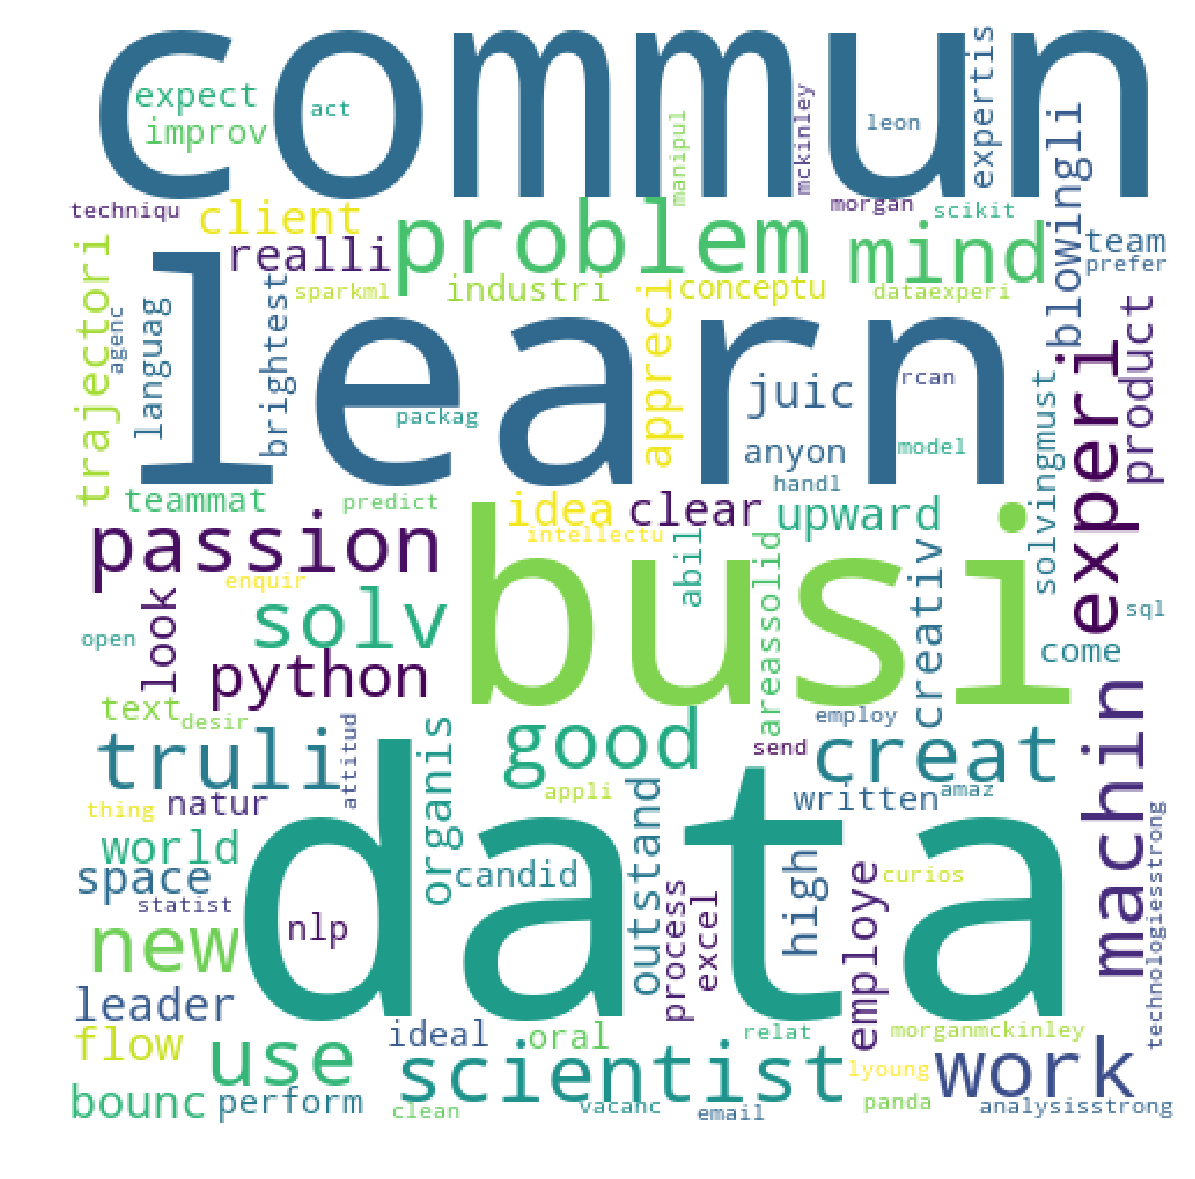

In [19]:
# generate word cloud - for the whole set
generate_word_cloud(X.stem)

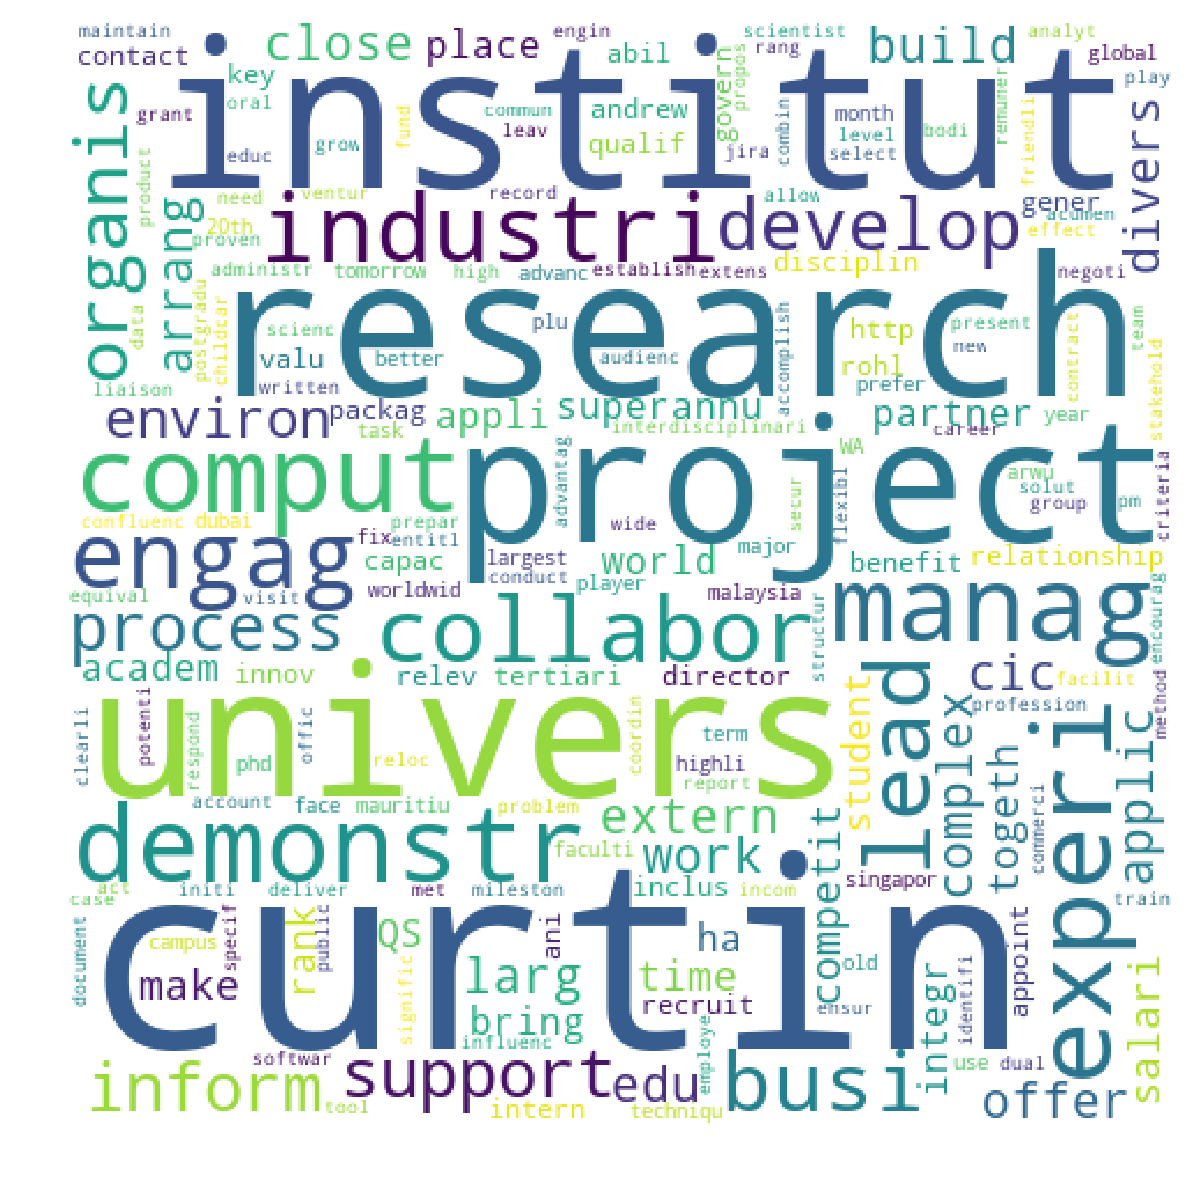

In [20]:
# generate word cloud - for the train set
generate_word_cloud(X_train.stem)

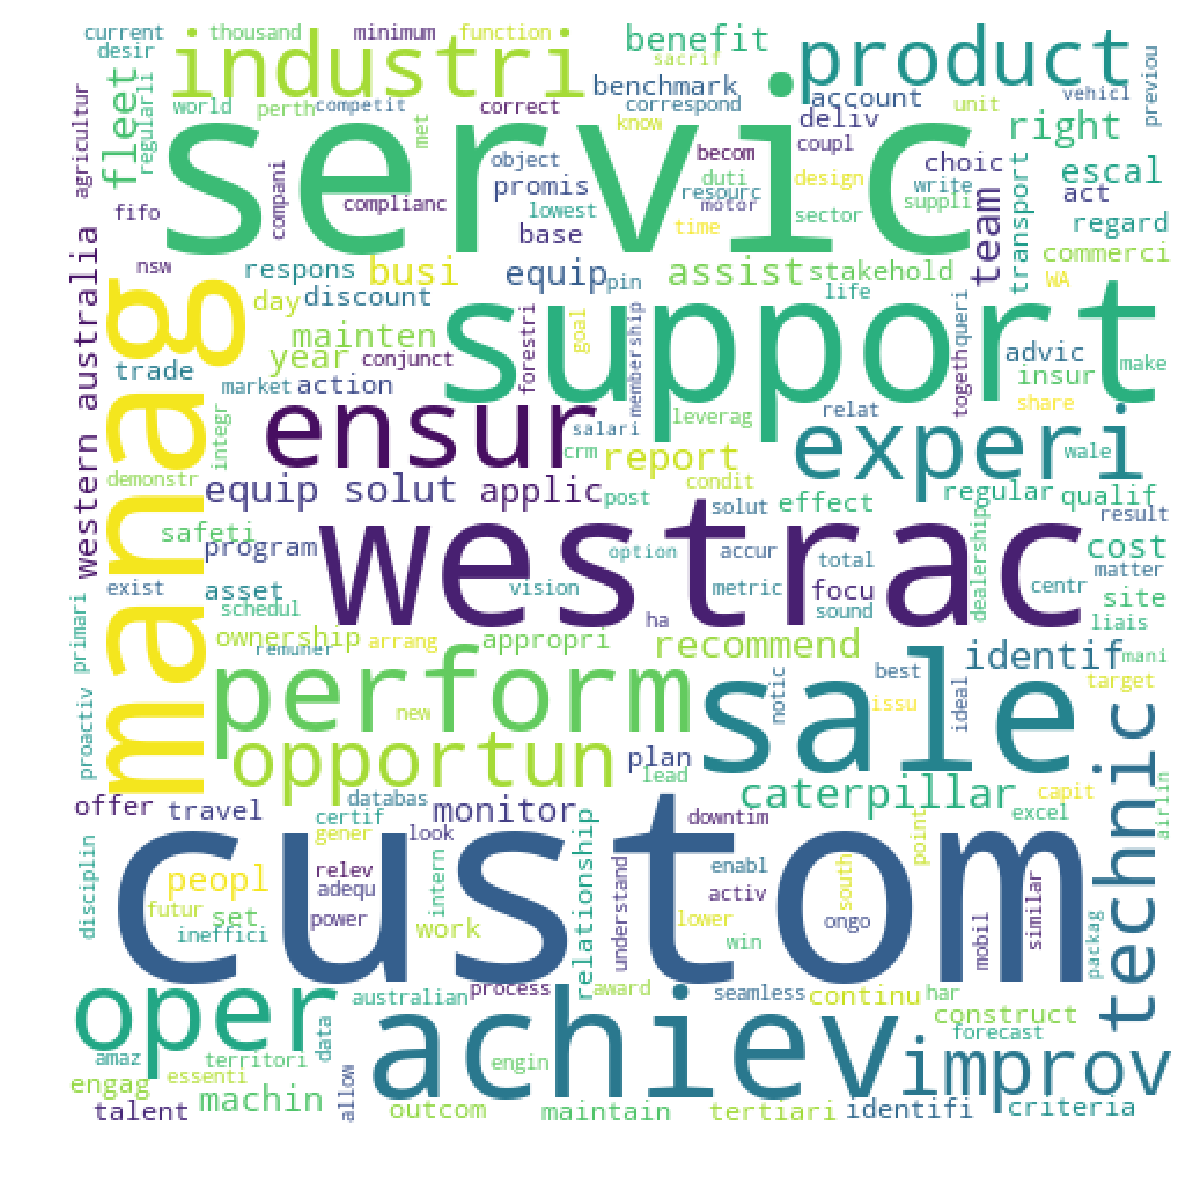

In [21]:
# generate word cloud - for the test set
generate_word_cloud(X_test.stem)

### Predict using Mltinomail Naive Bayes 

Predict using Mltinomail Naive Bayes with the new features from CountVectorizer.

In [22]:
# define a function that accepts a vectorizer and calculates the accuracy
def tokenize_test(vec):
    
    # Create document-term matrices - NLP
    #------------------------------------------------------------
    # Fitting and Transfrom the vectorizer on training data
    X_train_vec = vec.fit_transform(X_train['stem'])
    print('Features: ', X_train_vec.shape[1])

    # Transform on test data
    X_test_vec = vec.transform(X_test['stem'])
    #------------------------------------------------------------
    
    # Create dataframe after document-term matrices has been created
    #------------------------------------------------------------
    X_train_vec_df = pd.DataFrame(X_train_vec.todense(), columns=vec.get_feature_names())
    X_test_vec_df = pd.DataFrame(X_test_vec.todense(), columns=vec.get_feature_names())
    #------------------------------------------------------------
    
    # Extract top 10 and EDA
    #------------------------------------------------------------
    # top 10 words with highest frequency - work experience, management, data, team
    words = X_train_vec_df.sum().sort_values(ascending=False) #.head(20)
    #print(words)
    
    # plot top 10 words
    #words.plot(kind='bar', figsize=(15, 5))
    generate_word_cloud(words.to_dict(), True)
    #------------------------------------------------------------
    
    # Combine to create the full set of X
    #------------------------------------------------------------
    # remove stem columns as it now has been processed
    mask_train_df = X_train.drop('stem',axis=1).reset_index(drop=True)
    mask_test_df = X_test.drop('stem',axis=1).reset_index(drop=True)

    # time to put the data back to the main X_train and X_test
    X_train_dtm = pd.concat([mask_train_df, X_train_vec_df], axis=1)
    X_test_dtm = pd.concat([mask_test_df, X_test_vec_df], axis=1)
    #------------------------------------------------------------
    
    
    # Kbest Feature Selection after NLP
    #----------------------------------------------------------
    # build the selector (build one with each score type)
    skb_f = SelectKBest(f_classif) # default is k=10)

    # train the selector on data
    skb_f.fit(X_train_dtm, y_train)

    # examine results
    kbest = pd.DataFrame({'variable': X_train_dtm.columns.values.tolist(),
                         'score': list(skb_f.scores_)}).sort_values('score', ascending = False)
    
    kbest.columns = ['kBest_features', 'kBest_score']    
    kbest.reset_index(inplace=True, drop=True)

    # plot top 10 features
    kbest.head(20).plot(kind='bar', x='kBest_features', y='kBest_score', figsize=(15,5), grid=True)
    
    X_Ktrain = X_train_dtm[kbest.kBest_features]
    X_Ktest = X_test_dtm[kbest.kBest_features]

    return (X_Ktrain, X_Ktest)

In [23]:
def roc_confusion(y_test, y_pred, model_name):
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot of a ROC curve
    print ('Plotting ROC curve for ', model_name)
    plt.figure(figsize=[8,8])
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.title('Salary Classification', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()
    
    return None;

In [24]:
def apply_model(model, model_name, X_train_data, X_test_data):
    
#     print ('-----------------------------------')
#     print (model_name)
#     print ('-----------------------------------')
    model.fit(X_train_data, y_train)

    y_pred = model.predict(X_test_data)
    
    print(classification_report(y_test, y_pred))
    roc_confusion(y_test, y_pred, model_name)
    
    # confusion matrix - heat map plot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy score for best params: %.3f ' % accuracy)
    
    model_scores = cross_val_score(model, X_train_data, y_train, cv=5)
    train_score = model.score(X_train_data, y_train) 
    test_score = model.score(X_test_data, y_test)
#     print('Train score: %.3f ' % train_score)
#     print('Test score: %.3f ' % test_score)
    
    
    accuracy_crossval = np.mean(model_scores)
#     print('Train Mean CV R2: %.3f ' % accuracy_crossval)
    
    return [train_score, test_score, accuracy_crossval, accuracy]


In [25]:
mnb = MultinomialNB()
bnb = BernoulliNB()
logistic_l1 = LogisticRegression(penalty='l1')
logistic_l2 = LogisticRegression(penalty='l2')
rfr=RandomForestClassifier(max_depth=50,n_estimators=100, n_jobs=-1)
#knn = KNeighborsClassifier()

# logistic_l1 = LogisticRegression(C=10, solver='liblinear', penalty='l1', verbose=1)
# logistic_l2 = LogisticRegression(C=10, solver='liblinear', penalty='l2', verbose=1)

models = { mnb: 'Multinomail Naive Bayes',
          bnb: 'BernoulliNB Naive Bayes',
          logistic_l1: 'Logistic Regression L1',
          logistic_l2: 'Logistic Regression L2',
          rfr: 'Random Forest'}

colNames = ['Train', 'Test','Accuracy Crossval', 'Accuracy Score']

Features:  1000


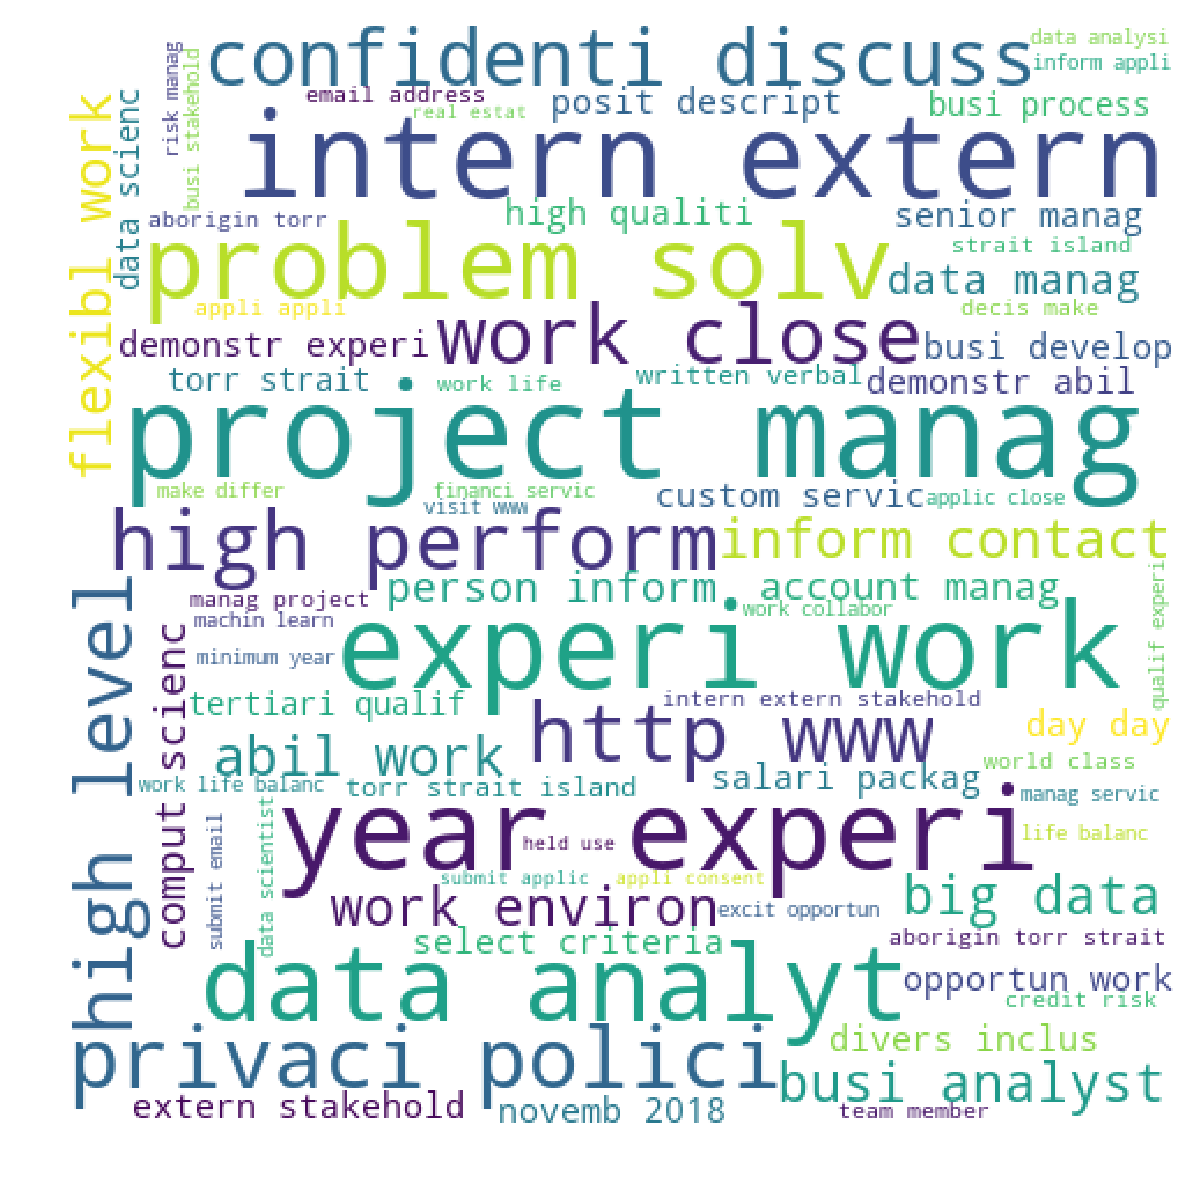

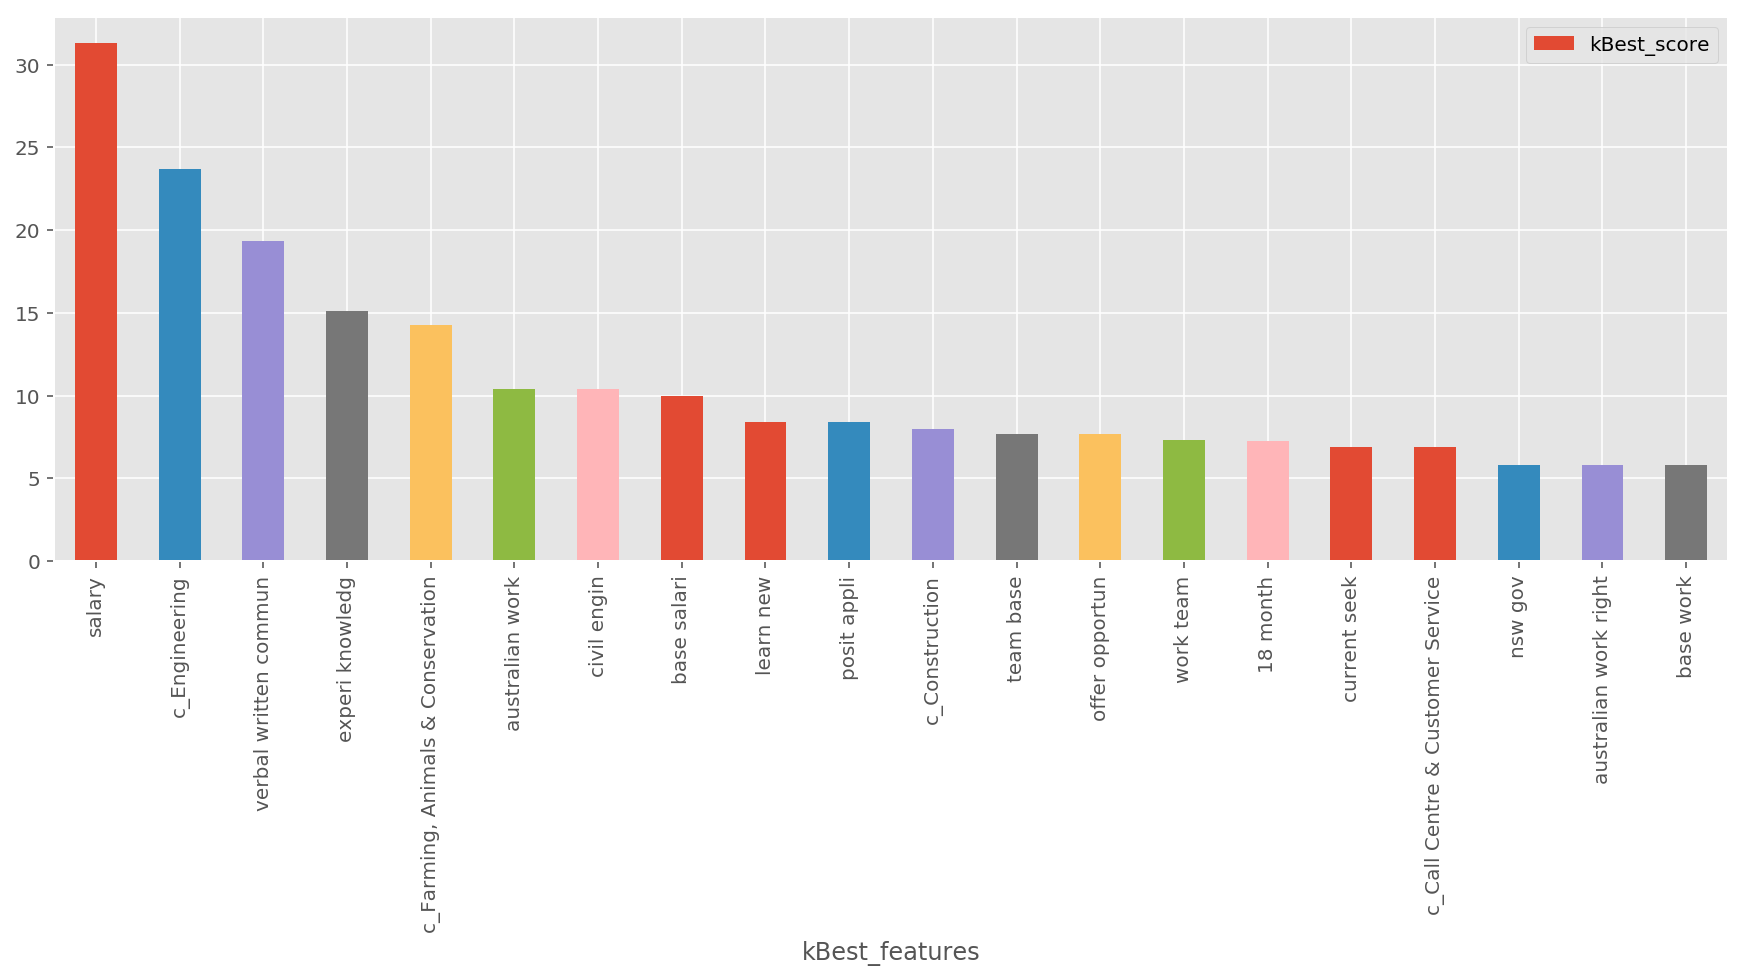

In [26]:
### Setting the countvectorizer with different parameters to see the differences
cvec = CountVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)
X_train_data1, X_test_data1 = tokenize_test(cvec)

Features:  200


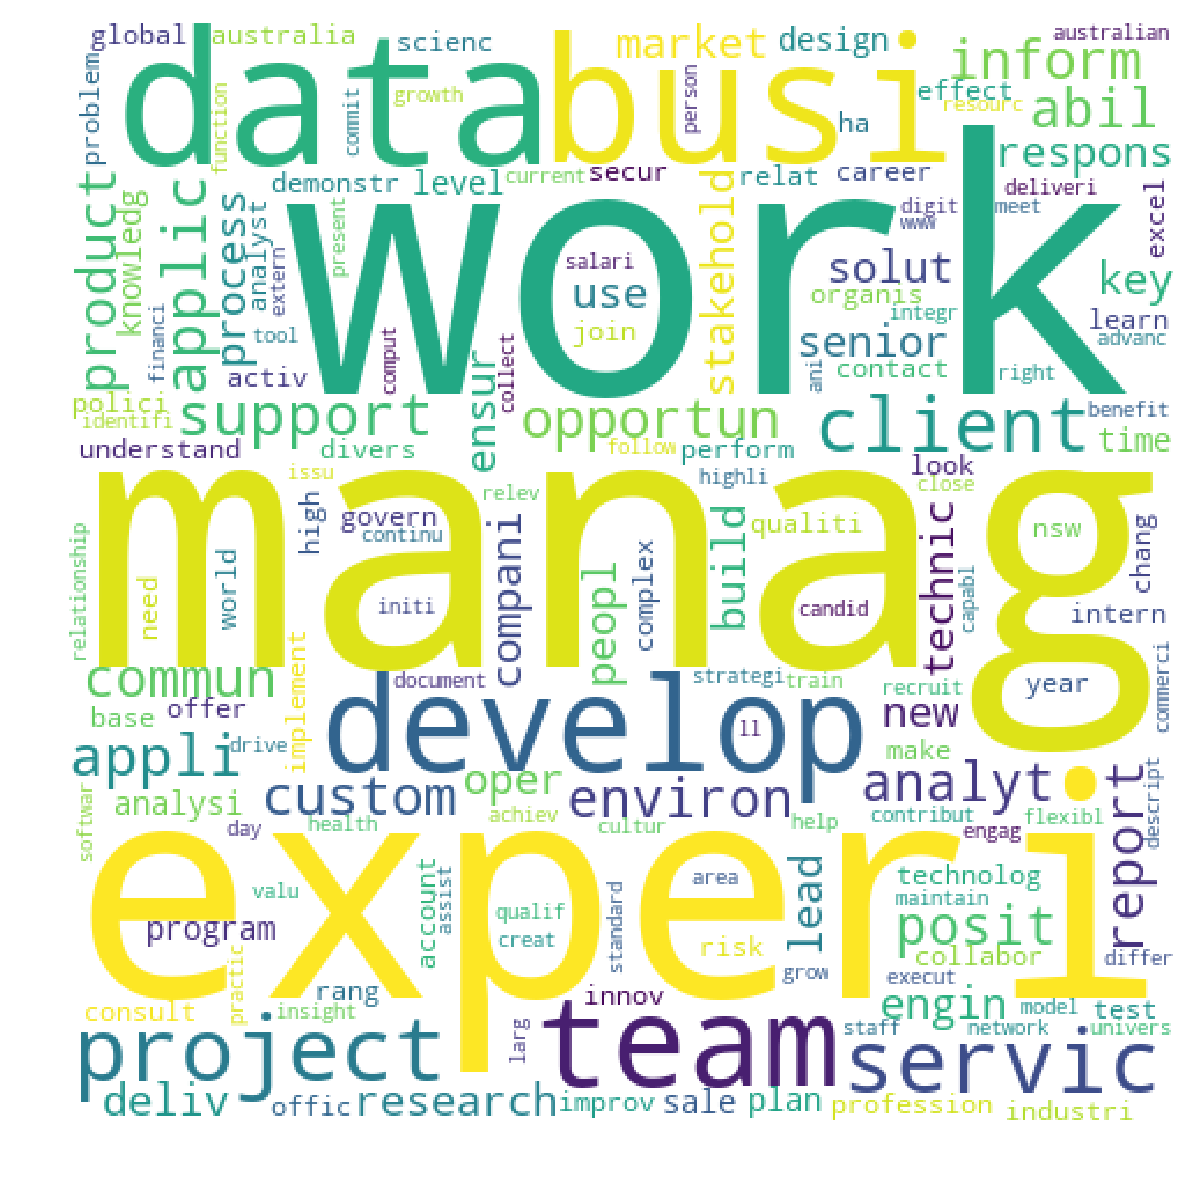

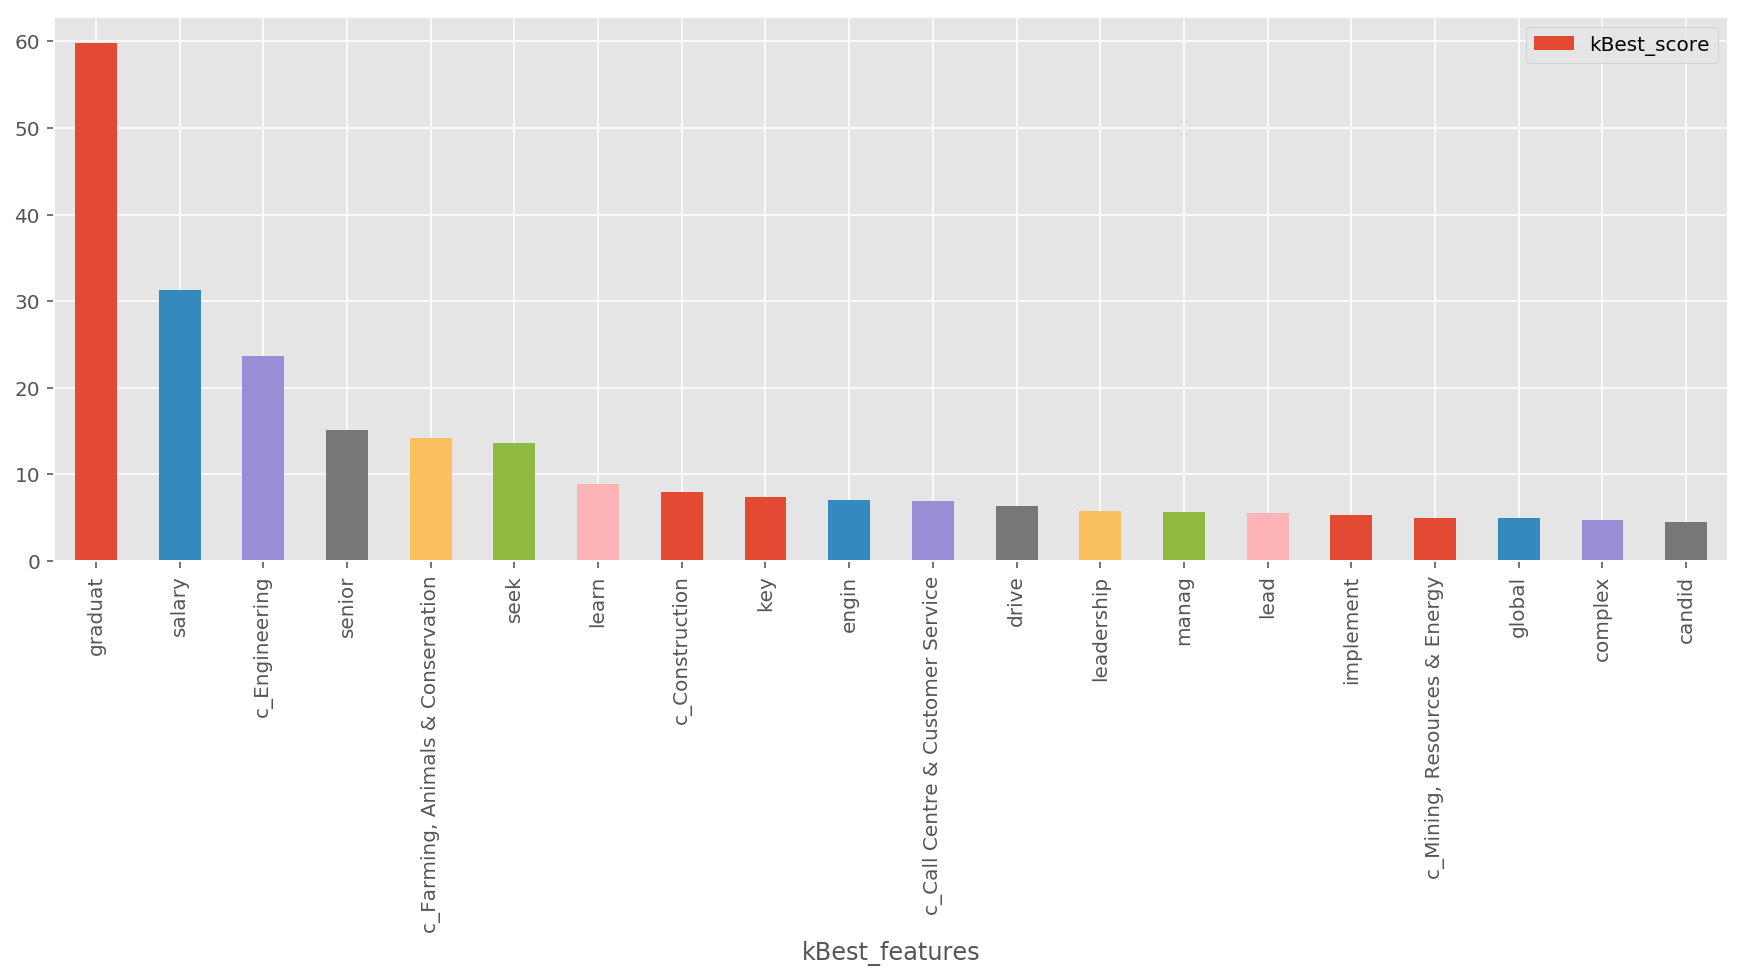

In [27]:
# Setting the vectorizer with different parameters to see the differences
cvec = CountVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# reuse the variables -> too many feature previously
X_train_data2, X_test_data2 = tokenize_test(cvec)

Most features selected are pretty similar from both cvec and tvec

### Why Use TFIDF?
- Common words are penalized
- Rare words have more influence

Sklearn provides a tf-idf vectorizer that works similarly to the other vectorizers. 
Eliminate stop words to improve our analysis.


Features:  200


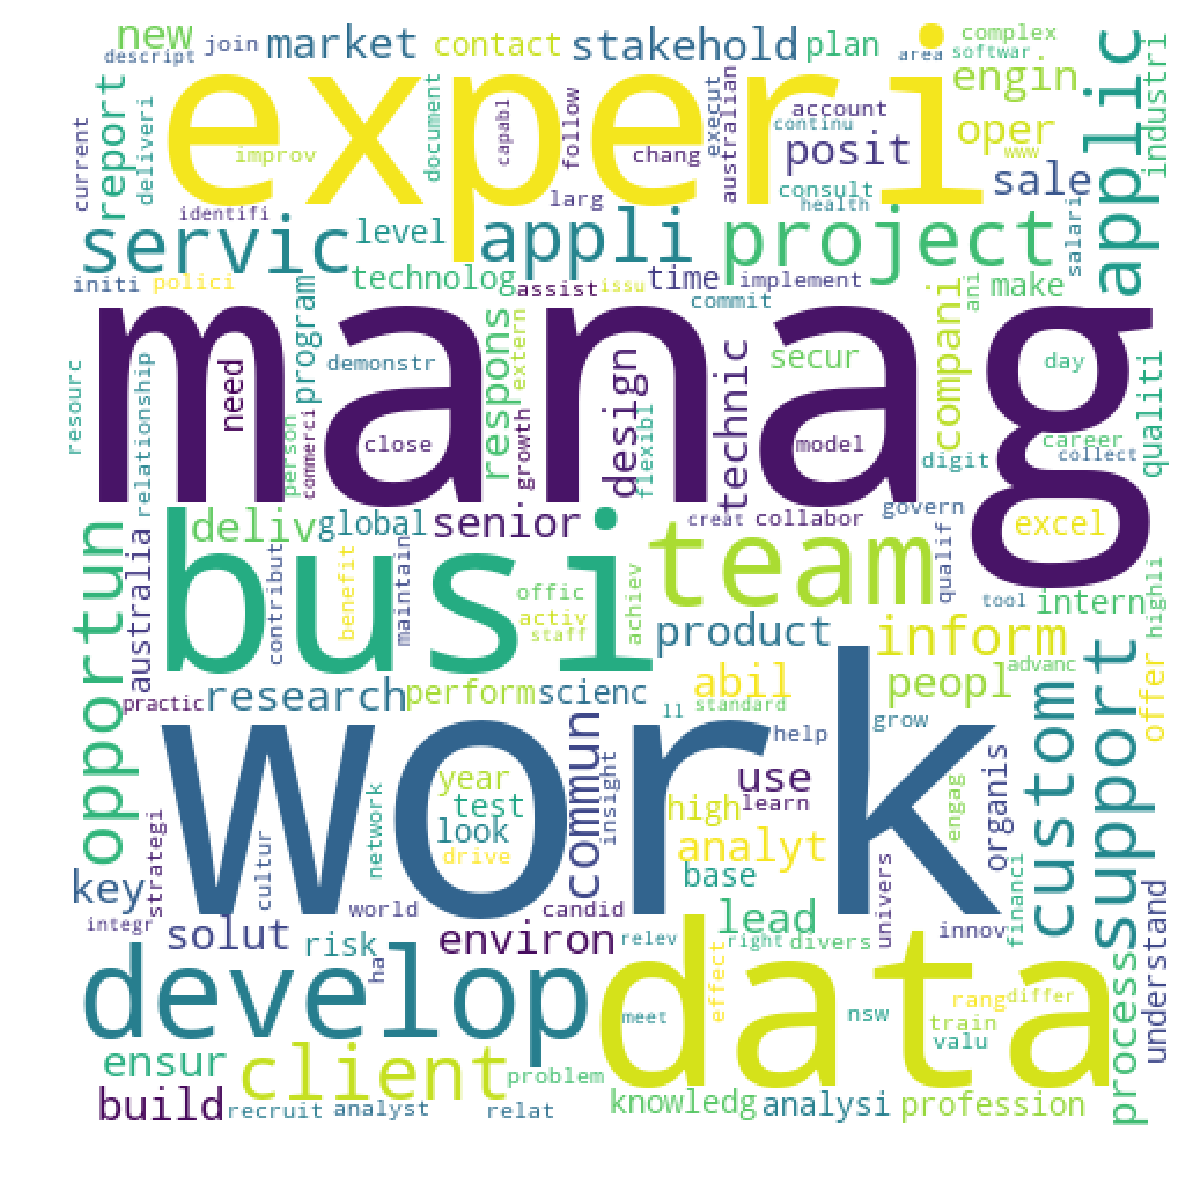

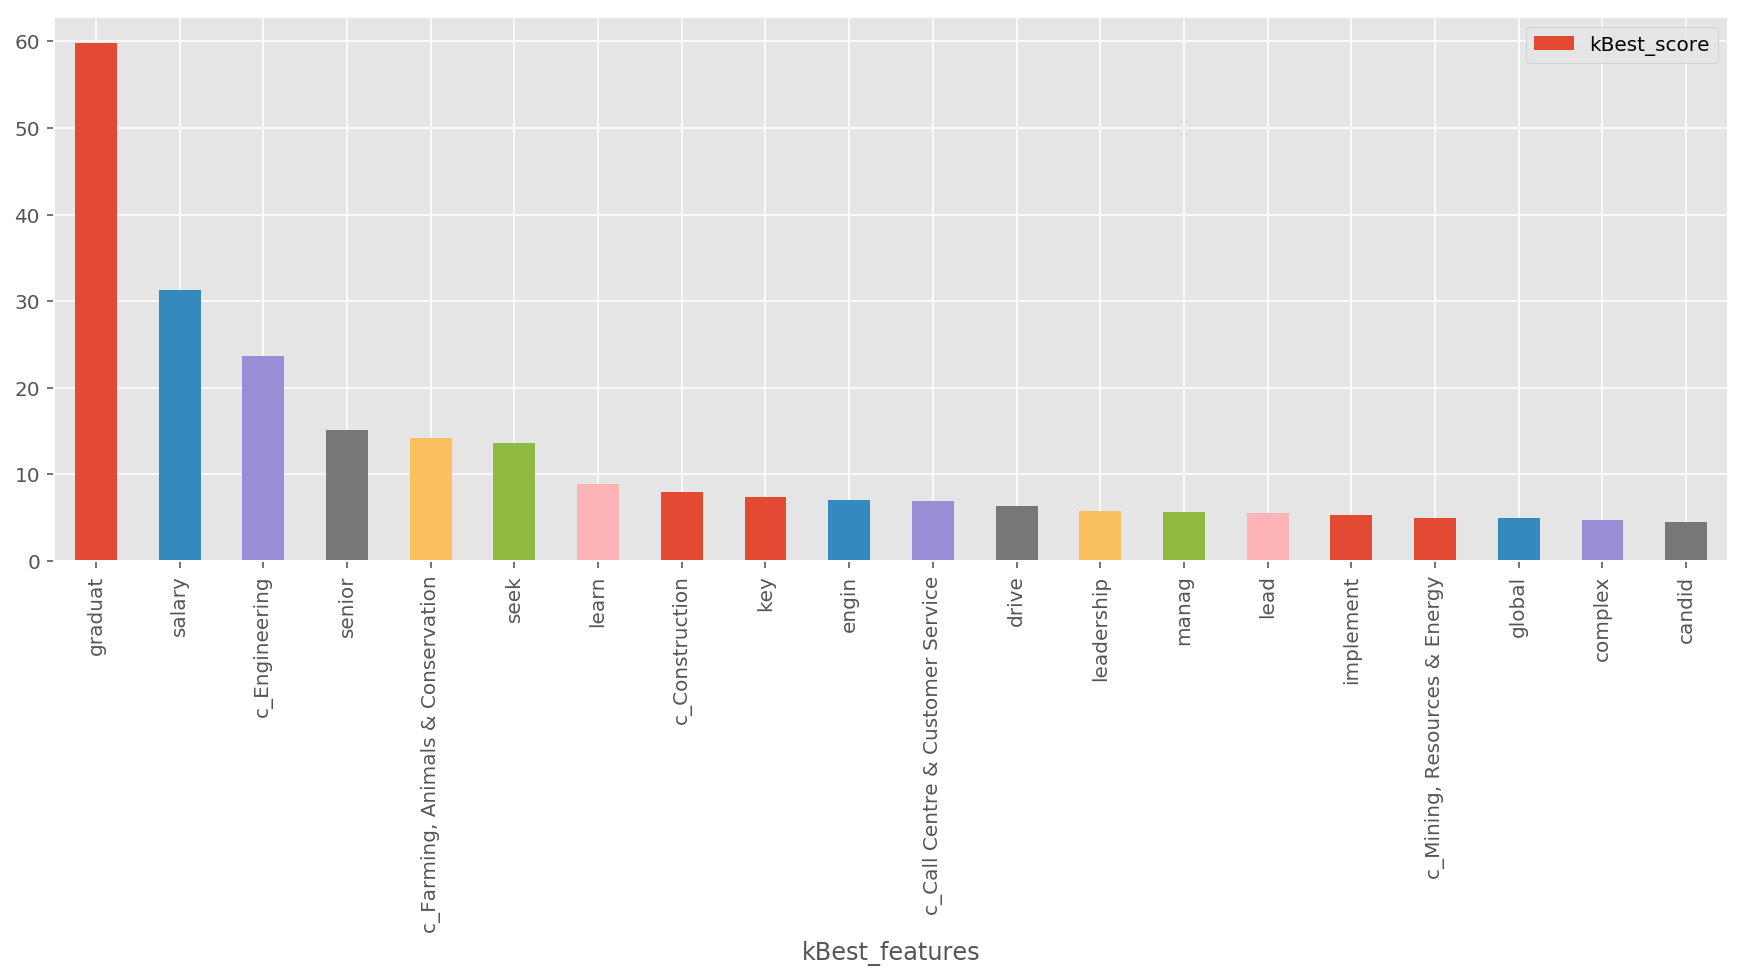

In [28]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(2,3), stop_words=custom_stop_words, max_features=1000)

# too many features previously - reuse the variables

# reuse the variables -> too many feature previously
X_train_data3, X_test_data3 = tokenize_test(cvec)


Features:  200


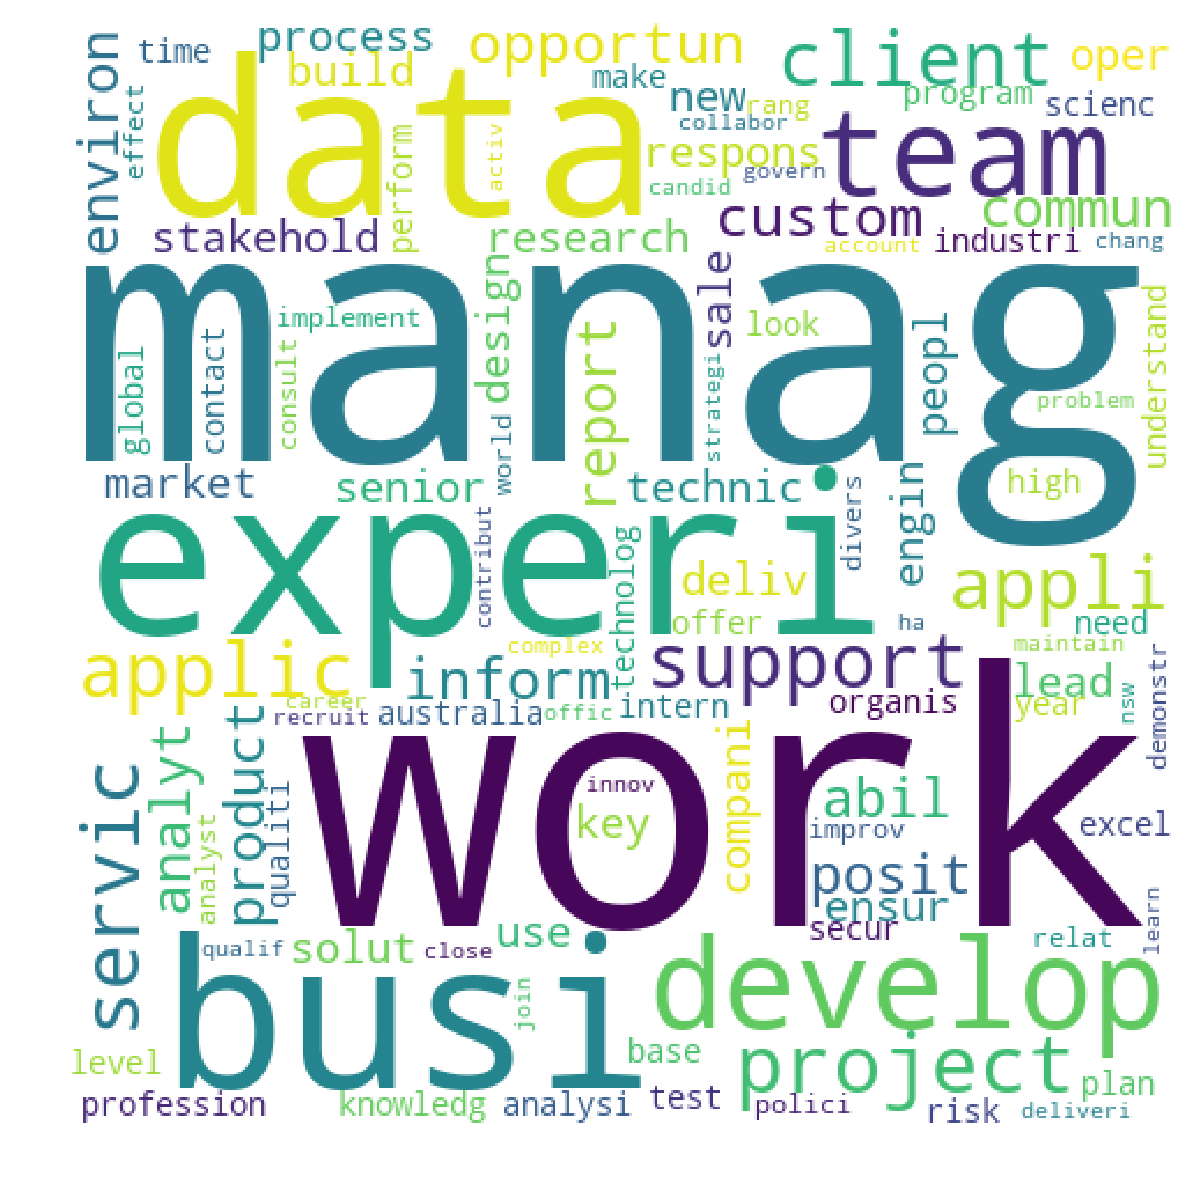

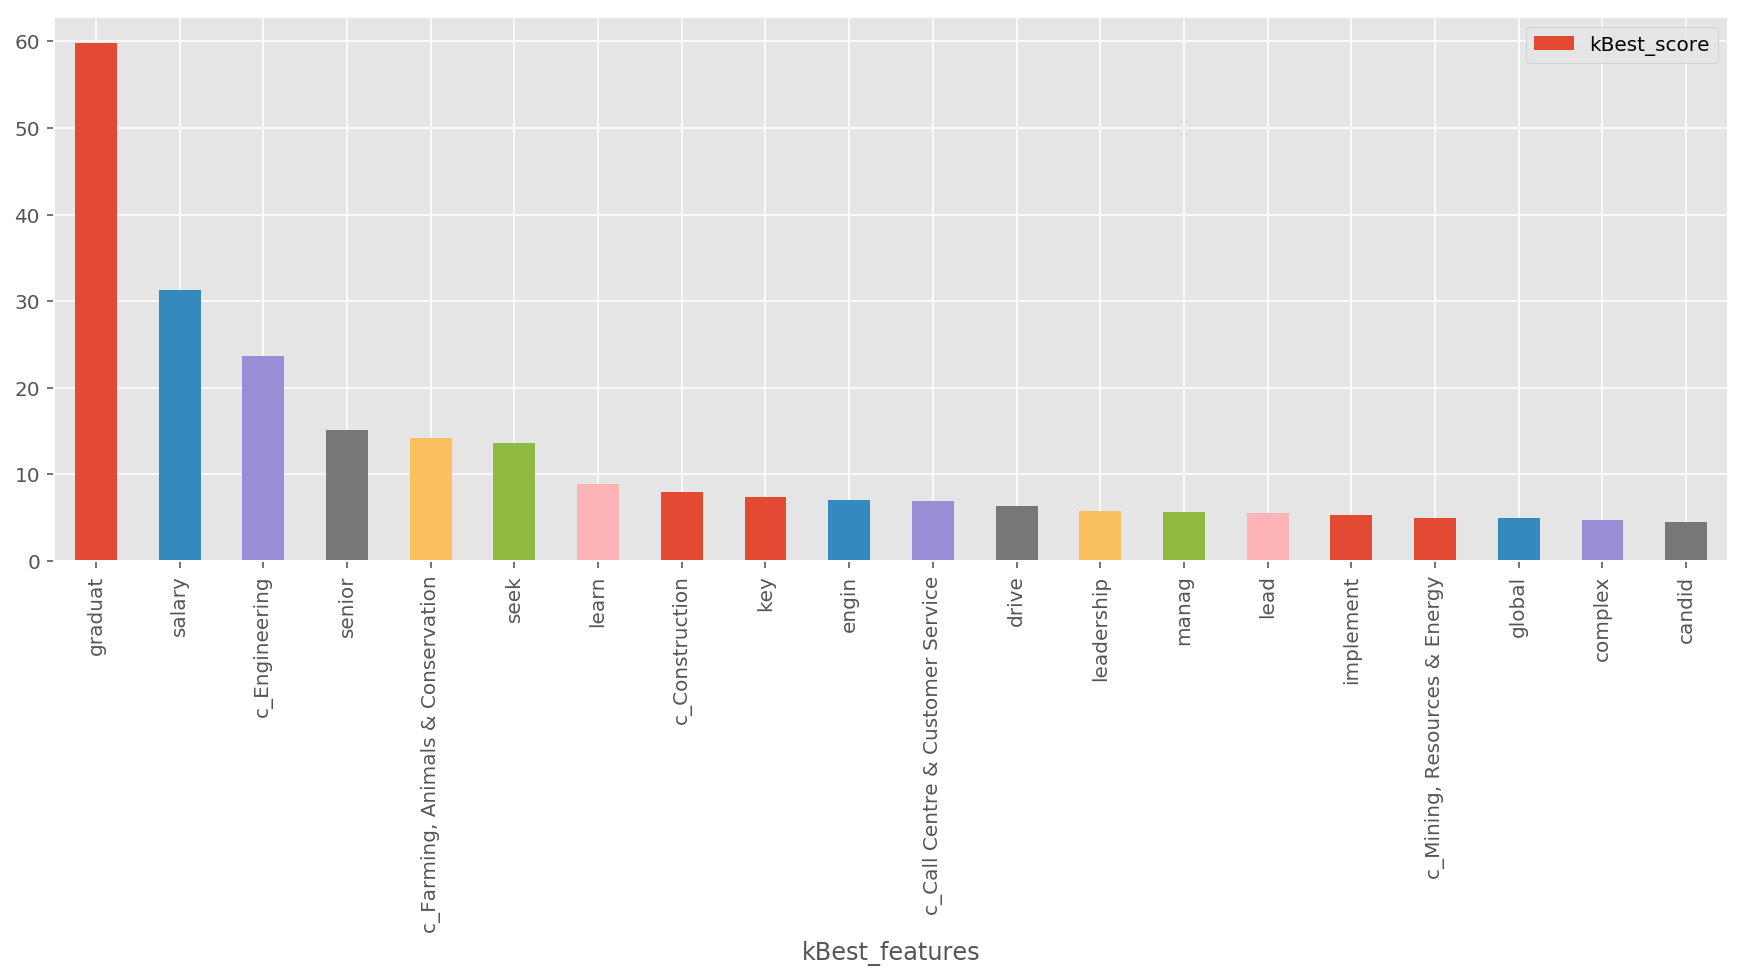

In [29]:
# Use the TfidfVectorizer
tvec = TfidfVectorizer(ngram_range=(1,3),stop_words=custom_stop_words, max_features=200)

# reuse the variables -> too many feature previously
X_train_data4, X_test_data4 = tokenize_test(cvec)


In [30]:
def apply_models(X_train_data, X_test_data):
    scores_list = []
    for model in models:
        scores_list.append(apply_model(model, models[model], X_train_data, X_test_data))

    scores_Df = pd.DataFrame(scores_list, index=models.values(), columns=colNames)
    return scores_Df

             precision    recall  f1-score   support

          0       0.41      0.69      0.51        13
          1       0.95      0.85      0.90        86

avg / total       0.88      0.83      0.85        99

             precision    recall  f1-score   support

          0       0.41      0.69      0.51        13
          1       0.95      0.85      0.90        86

avg / total       0.88      0.83      0.85        99

Plotting ROC curve for  Multinomail Naive Bayes


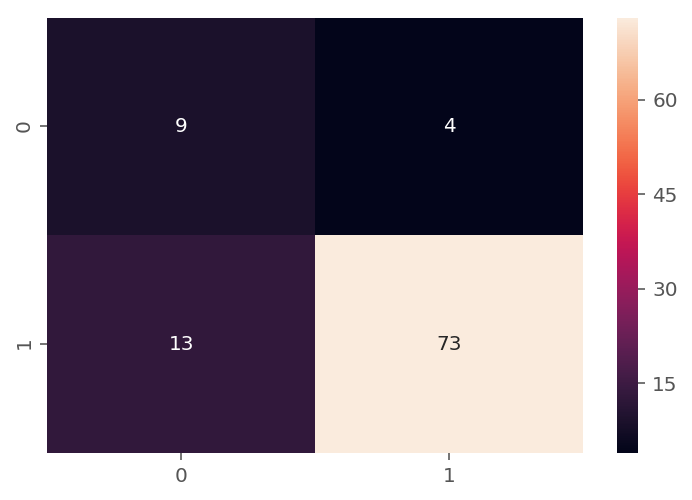

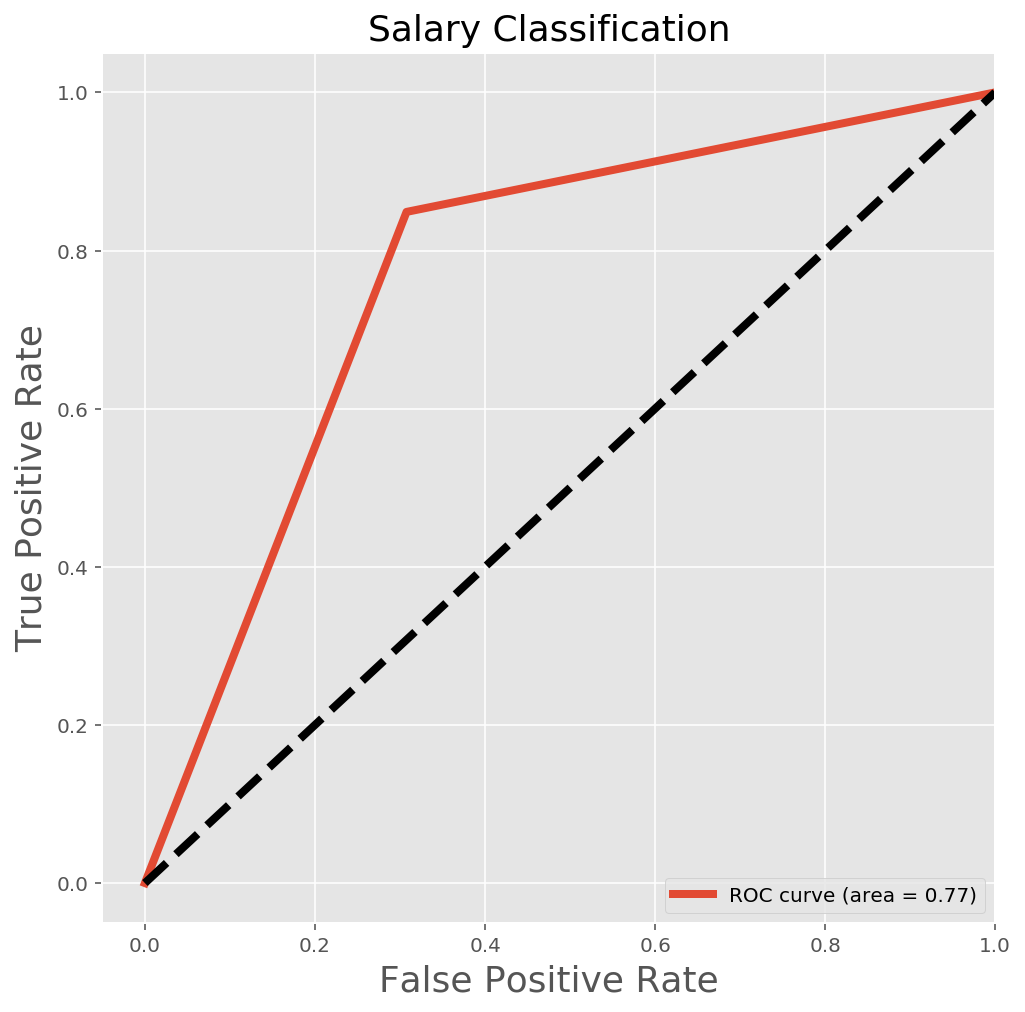

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      0.98      0.92        86

avg / total       0.75      0.85      0.80        99

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      0.98      0.92        86

avg / total       0.75      0.85      0.80        99

Plotting ROC curve for  BernoulliNB Naive Bayes


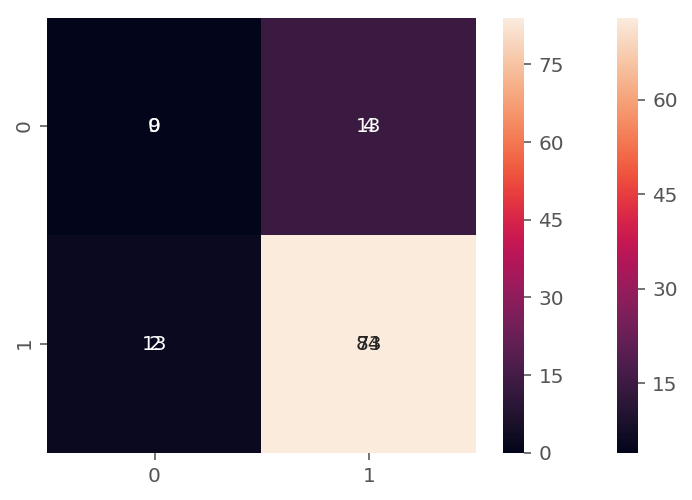

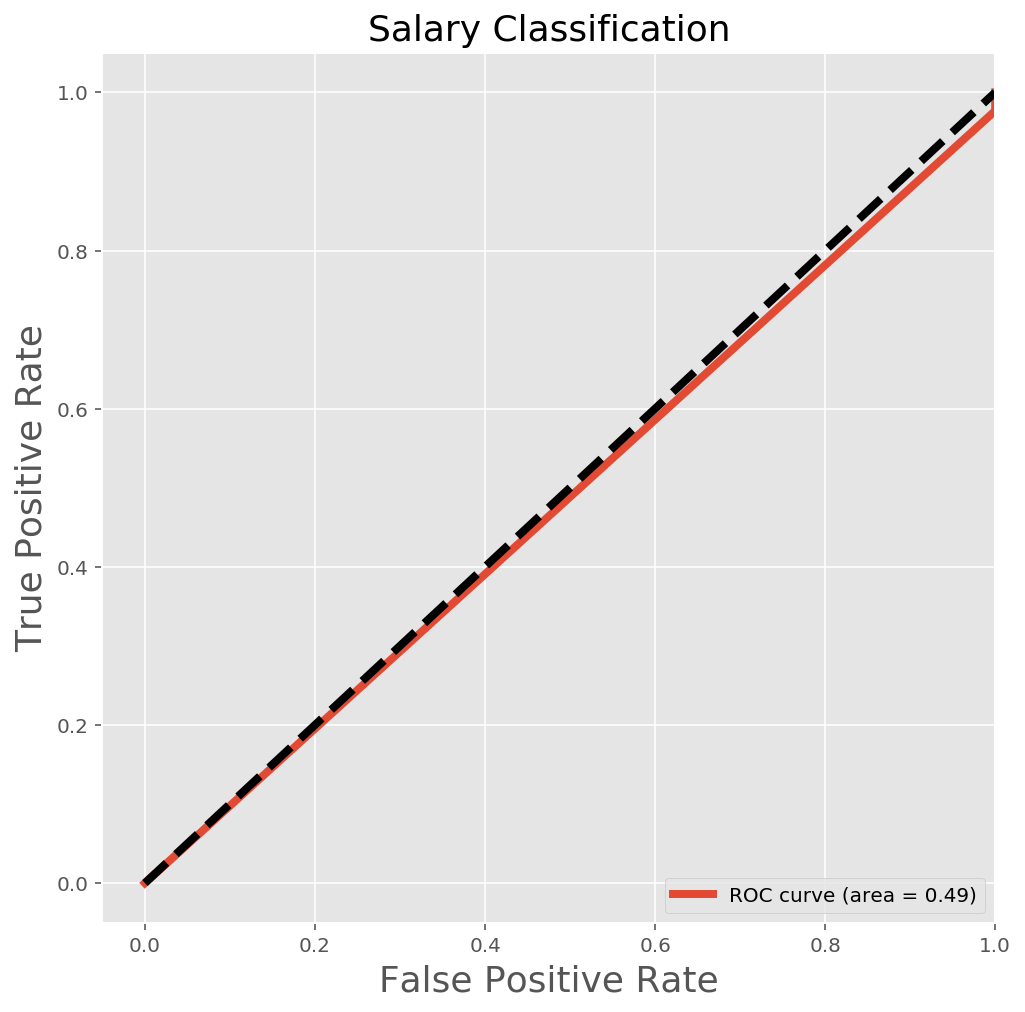

             precision    recall  f1-score   support

          0       0.60      0.23      0.33        13
          1       0.89      0.98      0.93        86

avg / total       0.86      0.88      0.85        99

             precision    recall  f1-score   support

          0       0.60      0.23      0.33        13
          1       0.89      0.98      0.93        86

avg / total       0.86      0.88      0.85        99

Plotting ROC curve for  Logistic Regression L1


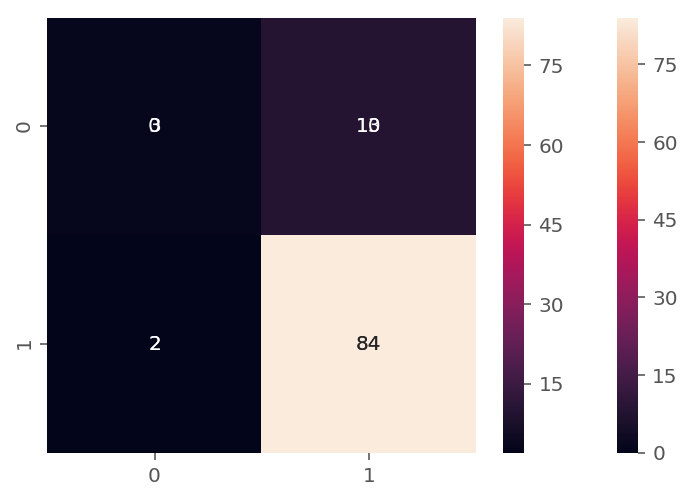

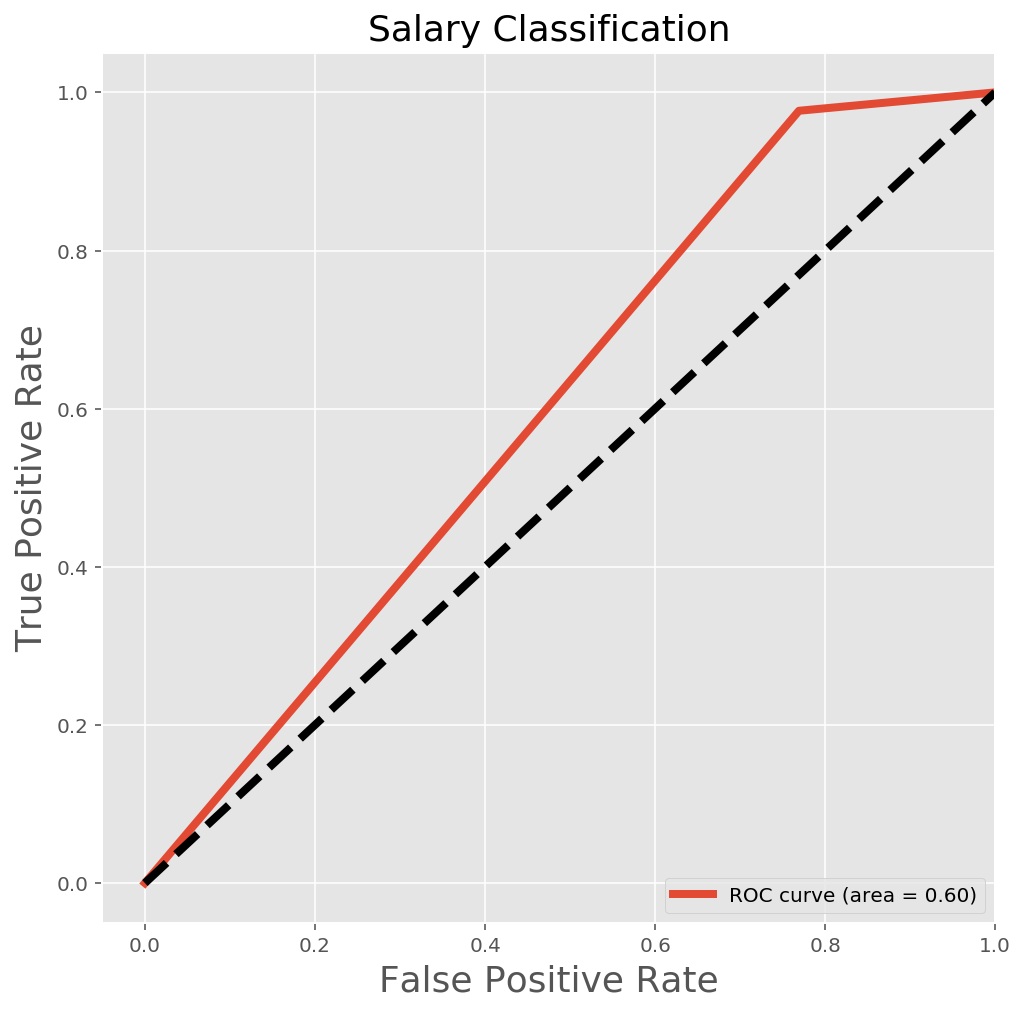

             precision    recall  f1-score   support

          0       0.75      0.23      0.35        13
          1       0.89      0.99      0.94        86

avg / total       0.88      0.89      0.86        99

             precision    recall  f1-score   support

          0       0.75      0.23      0.35        13
          1       0.89      0.99      0.94        86

avg / total       0.88      0.89      0.86        99

Plotting ROC curve for  Logistic Regression L2


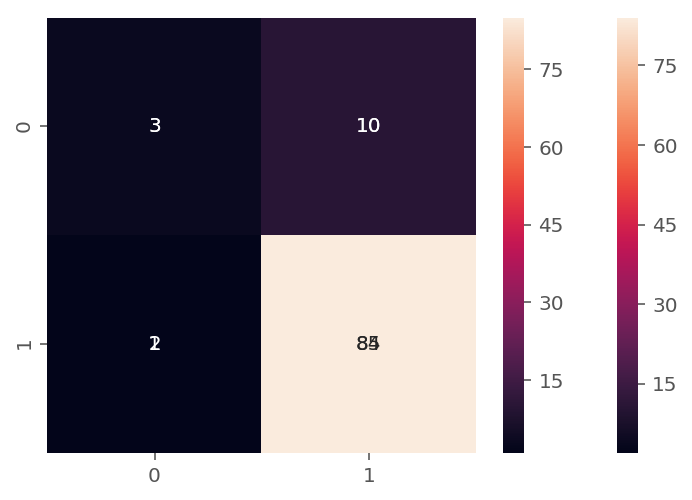

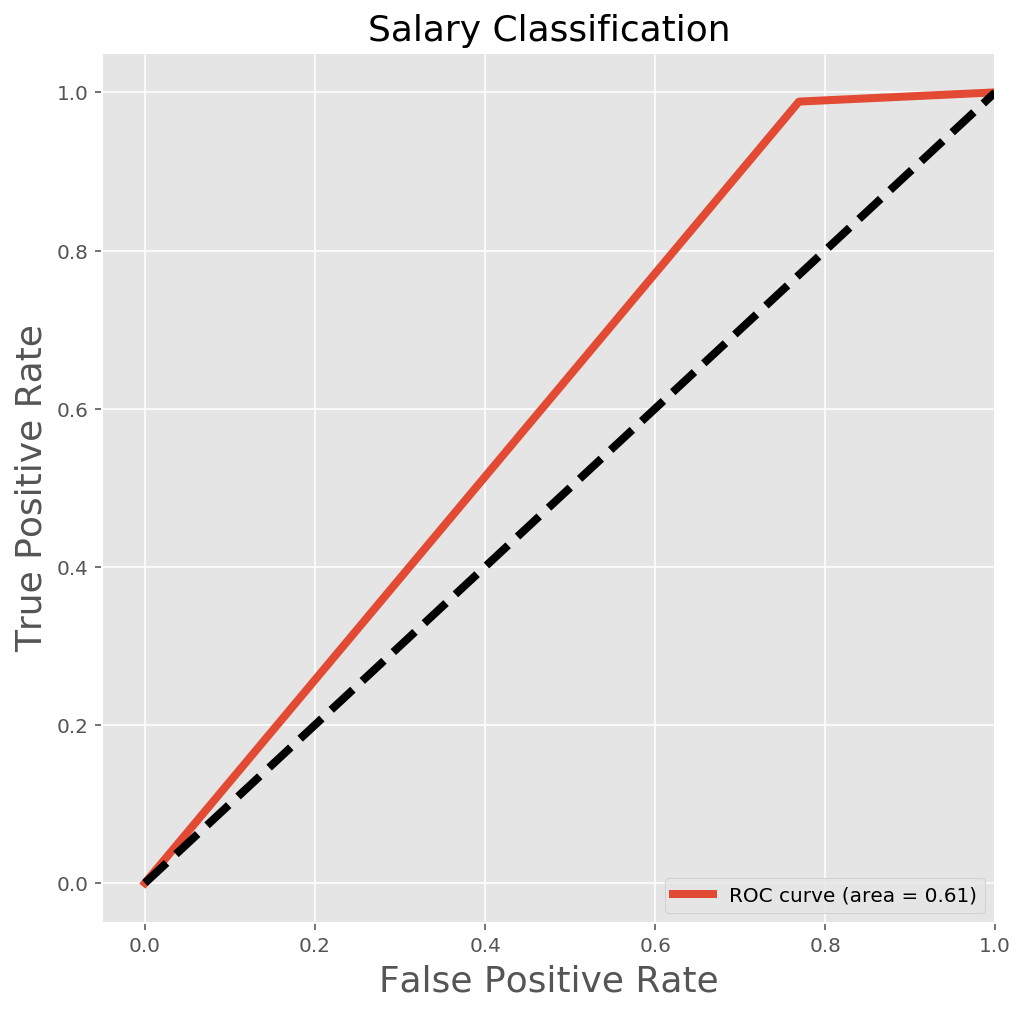

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      1.00      0.93        86

avg / total       0.75      0.87      0.81        99

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      1.00      0.93        86

avg / total       0.75      0.87      0.81        99

Plotting ROC curve for  Random Forest


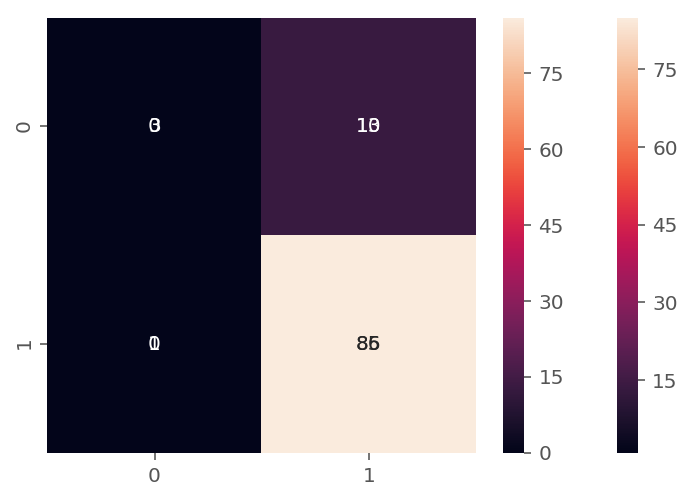

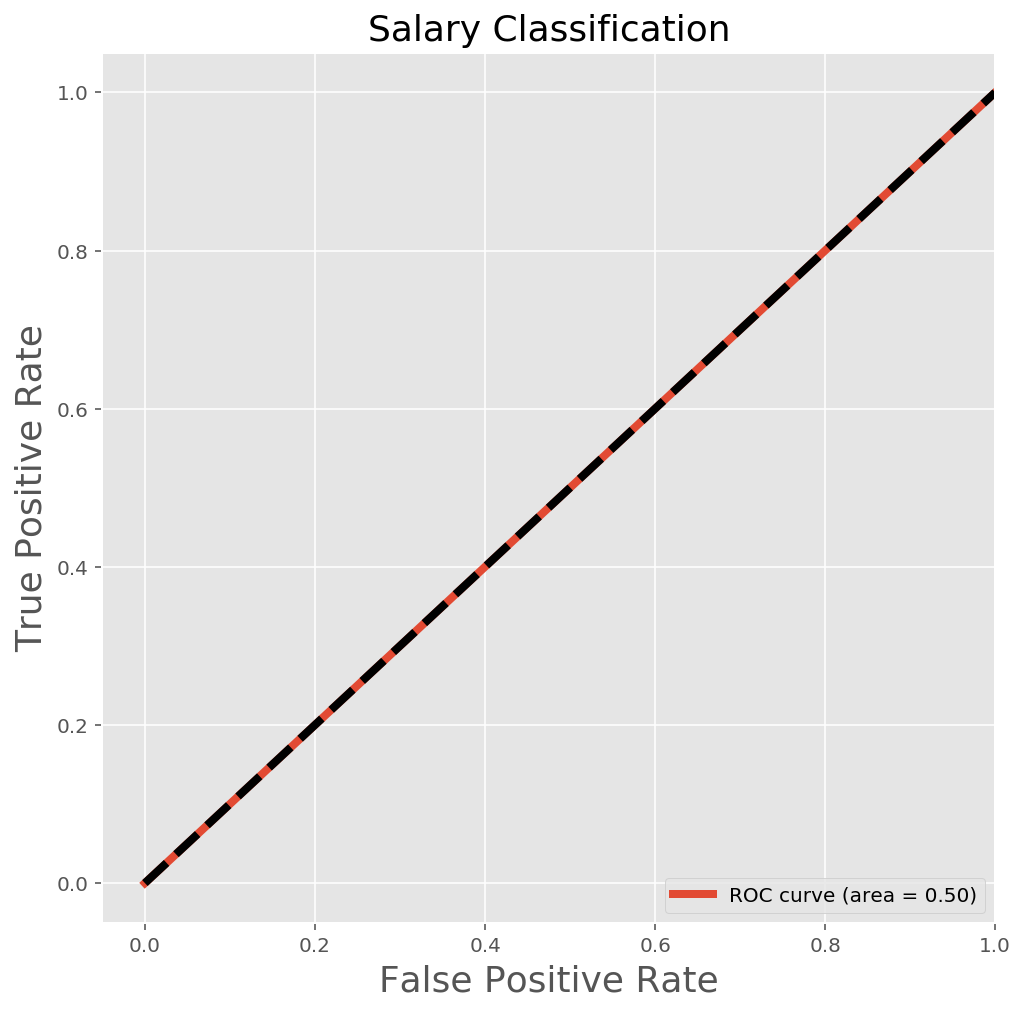

CVEC with word_max_features=1000 with ngrams of 2 - 3 words


Train      Test  Accuracy Crossval  Accuracy Score
Multinomail Naive Bayes  0.904762  0.828283           0.601388        0.828283
BernoulliNB Naive Bayes  0.948052  0.848485           0.748844        0.848485
Logistic Regression L1   0.965368  0.878788           0.857077        0.878788
Logistic Regression L2   1.000000  0.888889           0.878816        0.888889
Random Forest            1.000000  0.868687           0.870120        0.868687

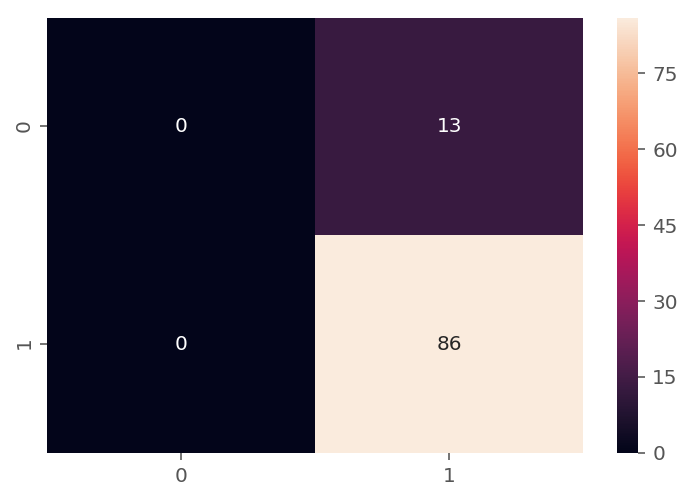

In [31]:
df = apply_models(X_train_data1, X_test_data1)
print('CVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

Plotting ROC curve for  Multinomail Naive Bayes


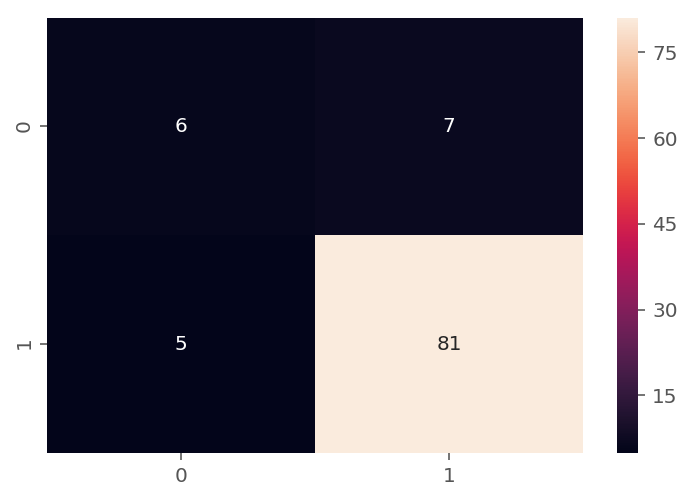

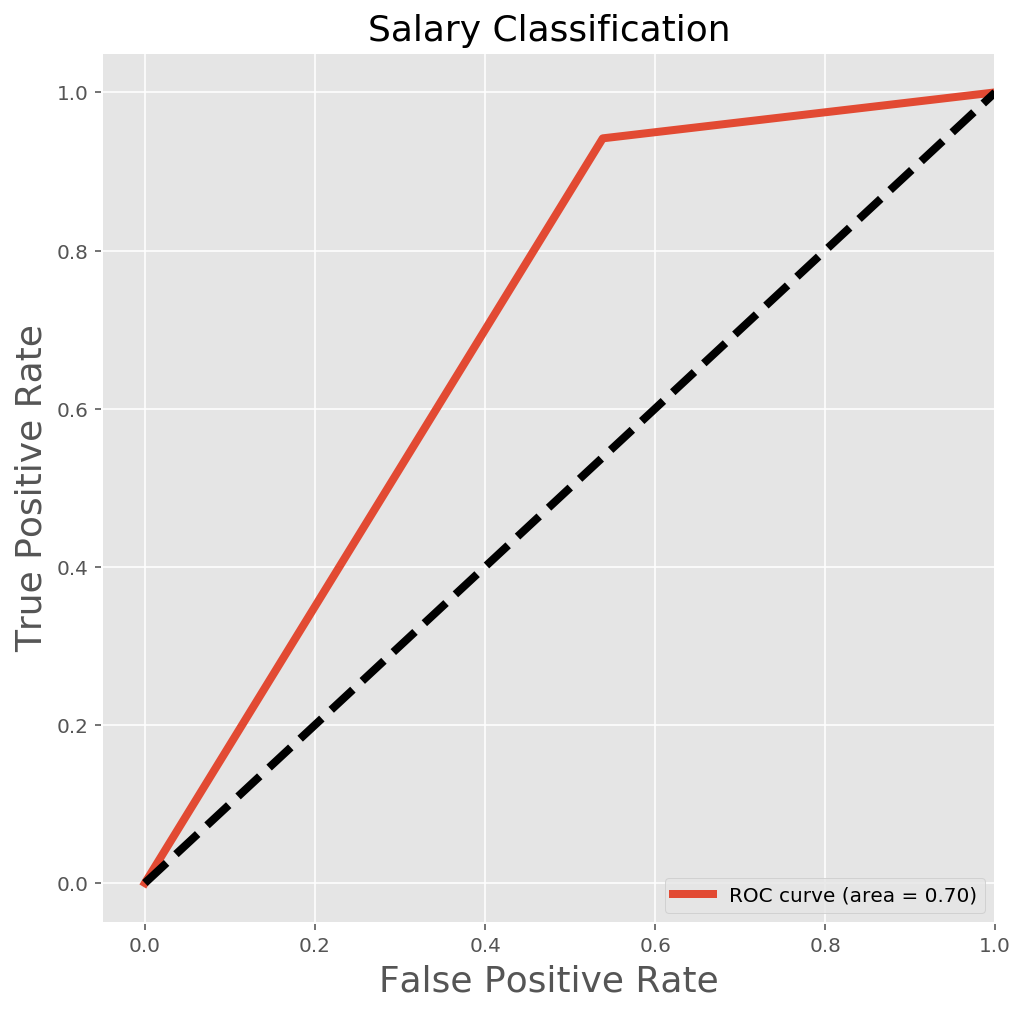

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

Plotting ROC curve for  BernoulliNB Naive Bayes


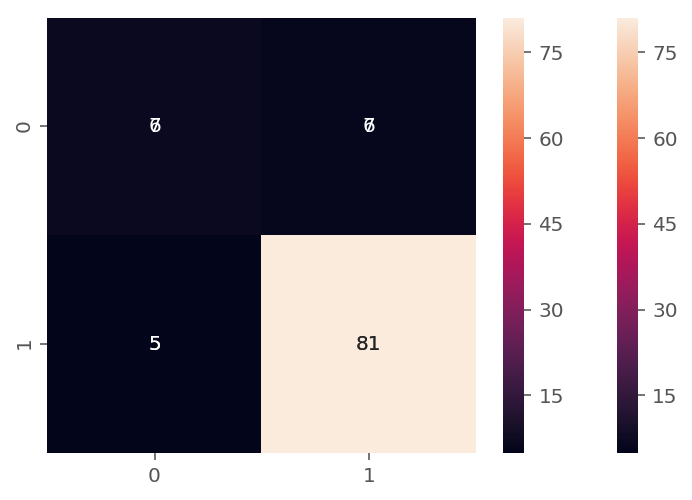

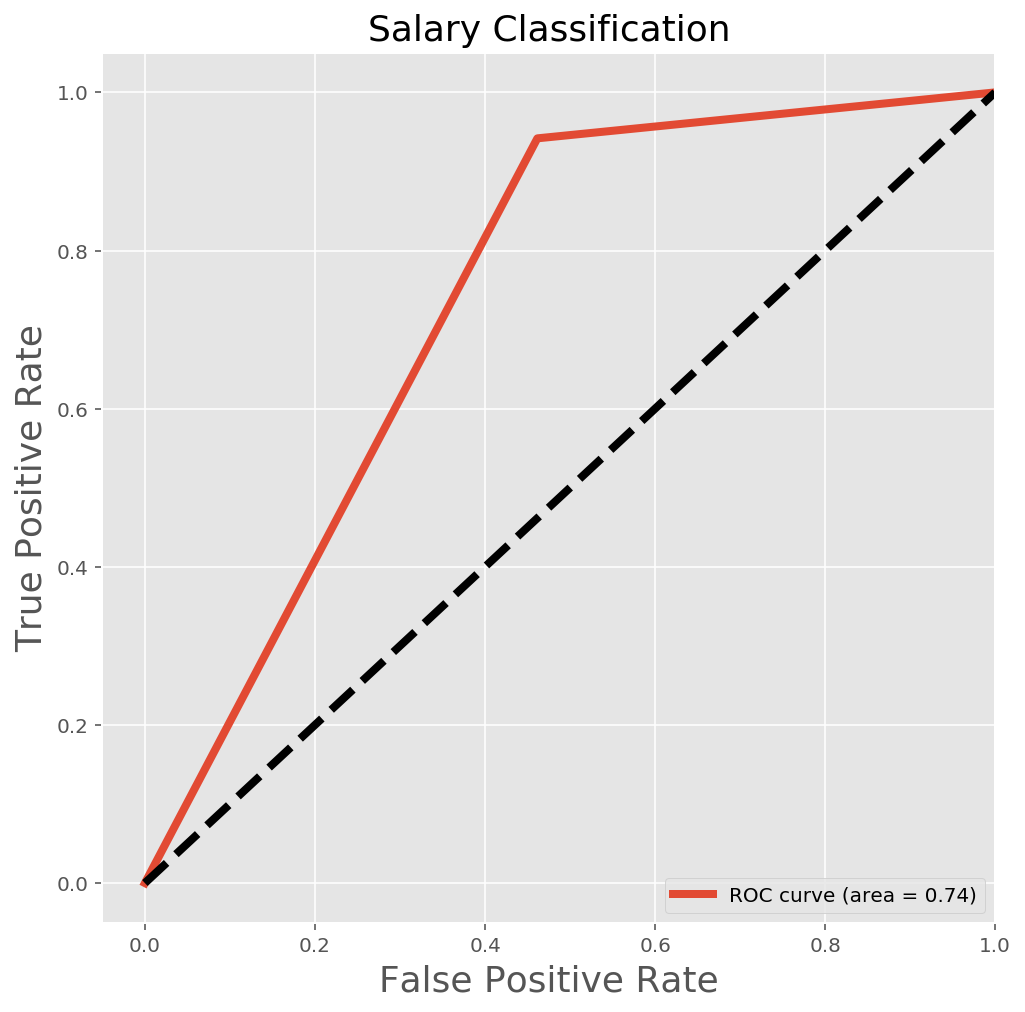

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

Plotting ROC curve for  Logistic Regression L1


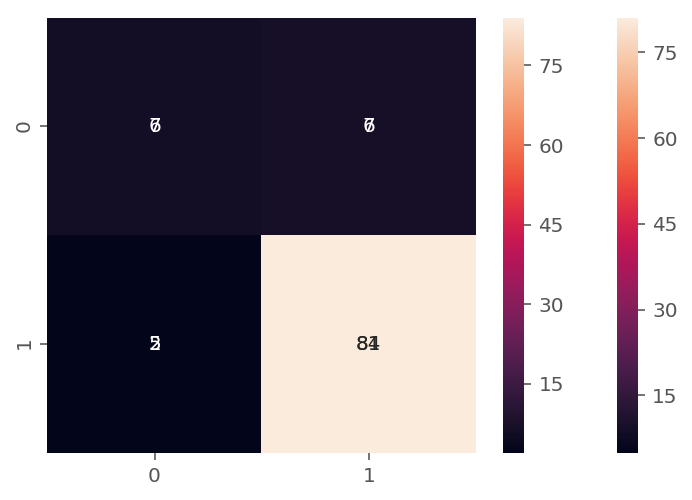

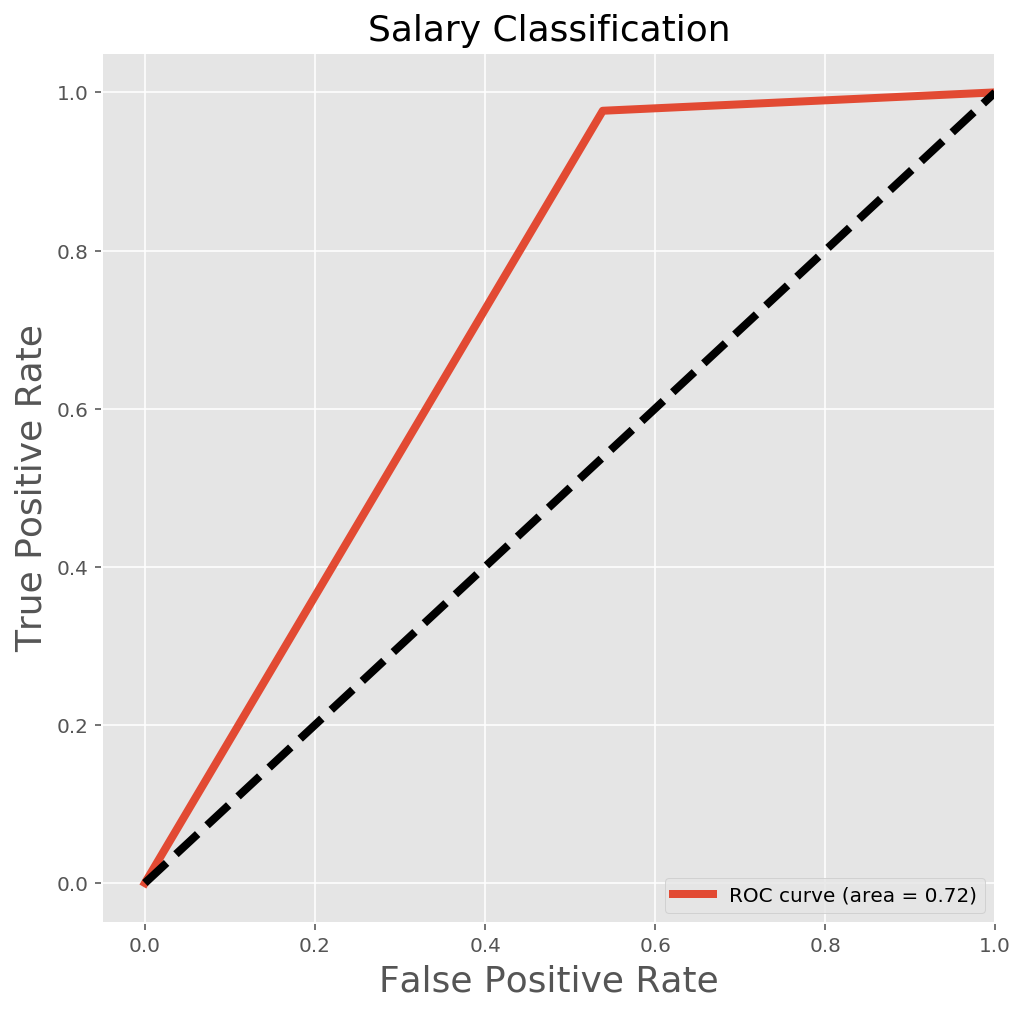

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

Plotting ROC curve for  Logistic Regression L2


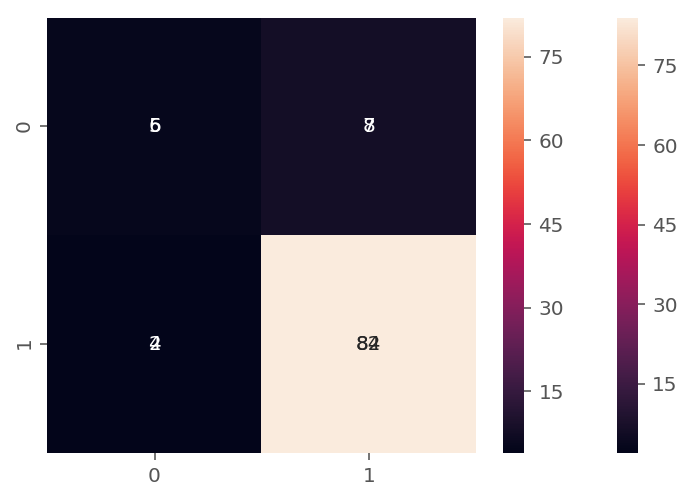

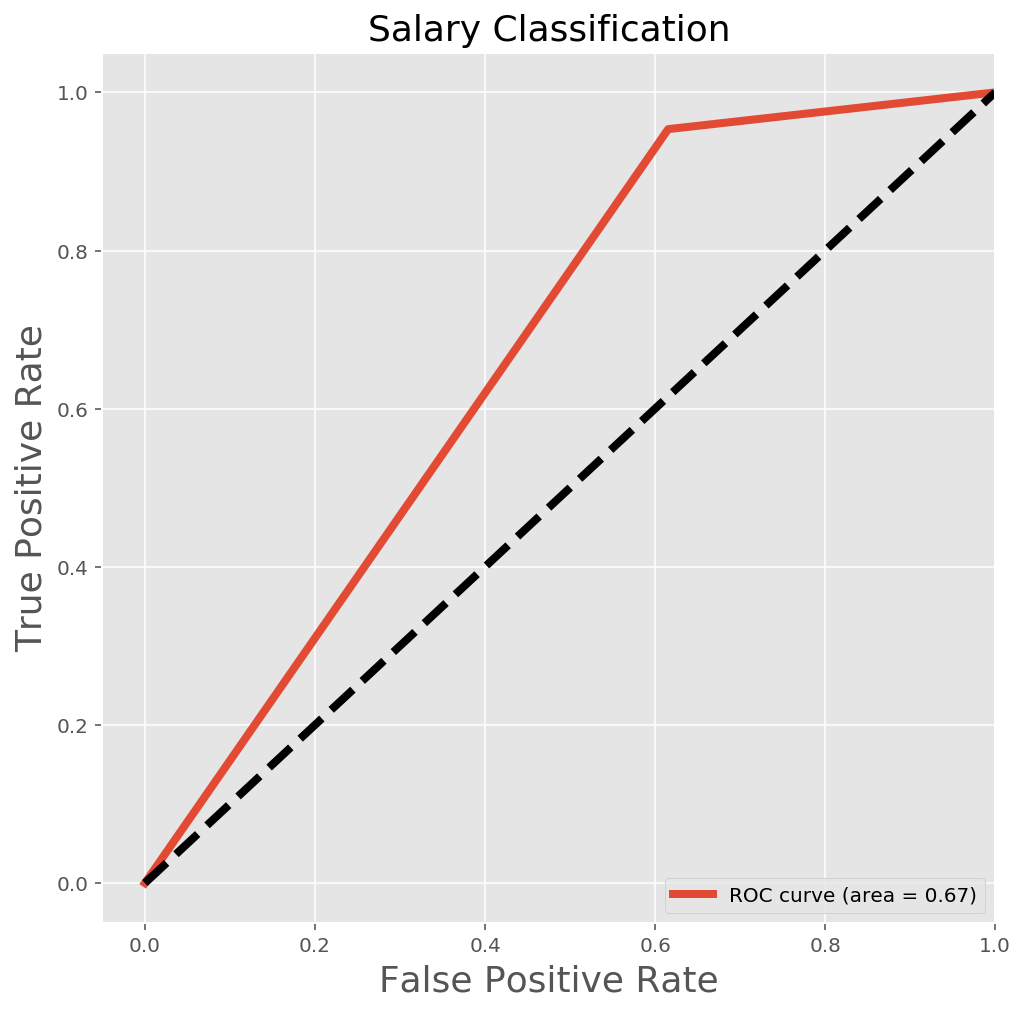

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      1.00      0.93        86

avg / total       0.75      0.87      0.81        99

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        13
          1       0.87      1.00      0.93        86

avg / total       0.75      0.87      0.81        99

Plotting ROC curve for  Random Forest


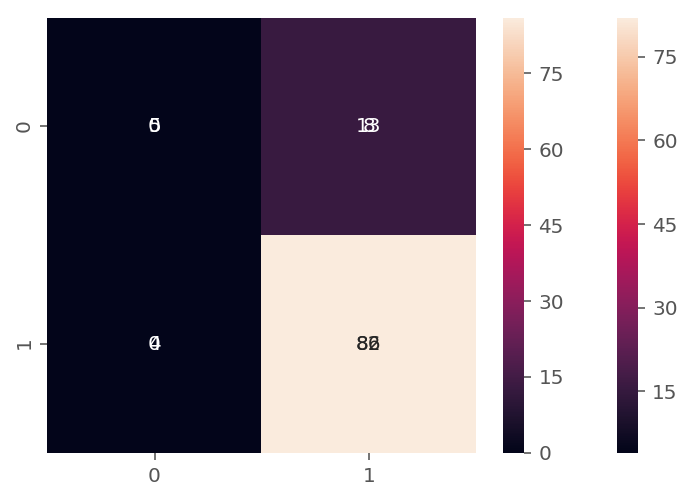

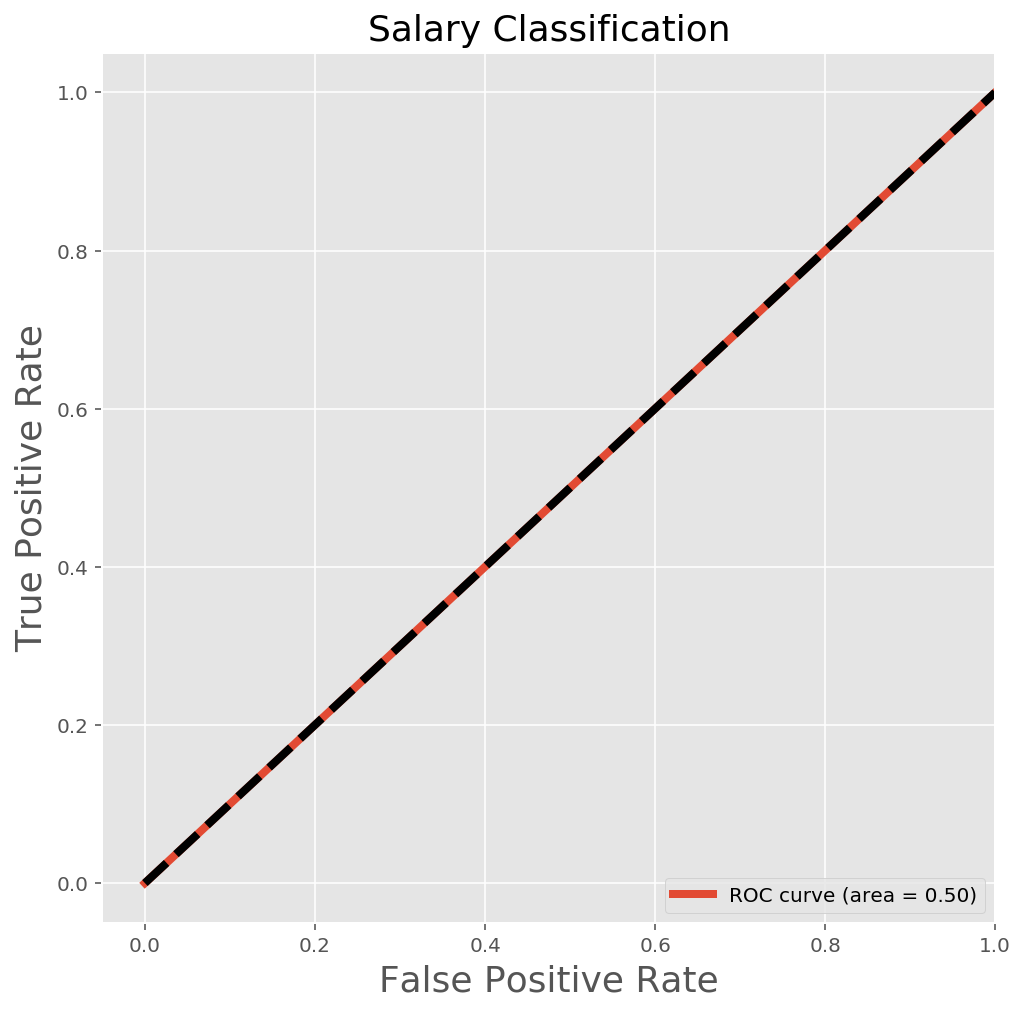

CVEC with word_max_features=200 with ngrams of 1 - 3 words


Train      Test  Accuracy Crossval  Accuracy Score
Multinomail Naive Bayes  0.943723  0.878788           0.857169        0.878788
BernoulliNB Naive Bayes  0.965368  0.888889           0.891859        0.888889
Logistic Regression L1   1.000000  0.909091           0.904718        0.909091
Logistic Regression L2   1.000000  0.878788           0.917854        0.878788
Random Forest            1.000000  0.868687           0.870120        0.868687

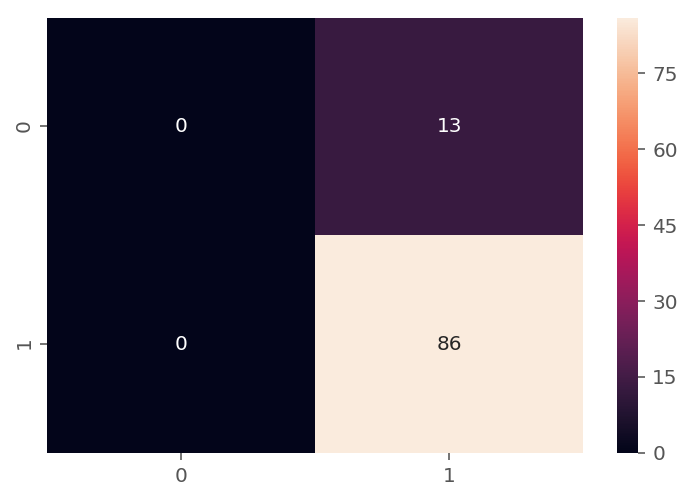

In [32]:
df = apply_models(X_train_data2, X_test_data2)
print('CVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

Plotting ROC curve for  Multinomail Naive Bayes


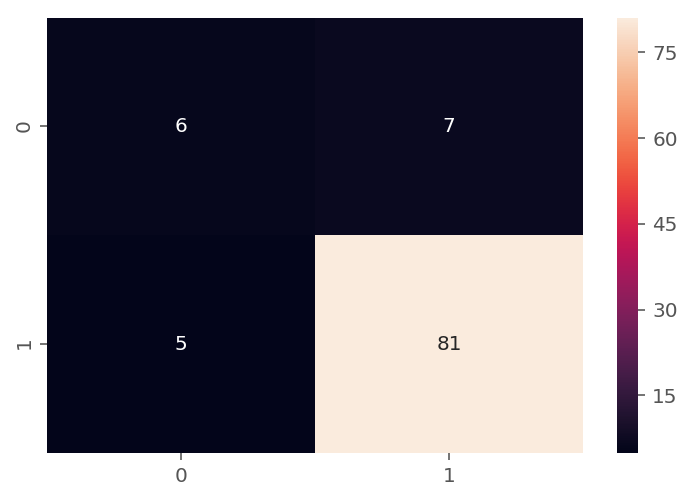

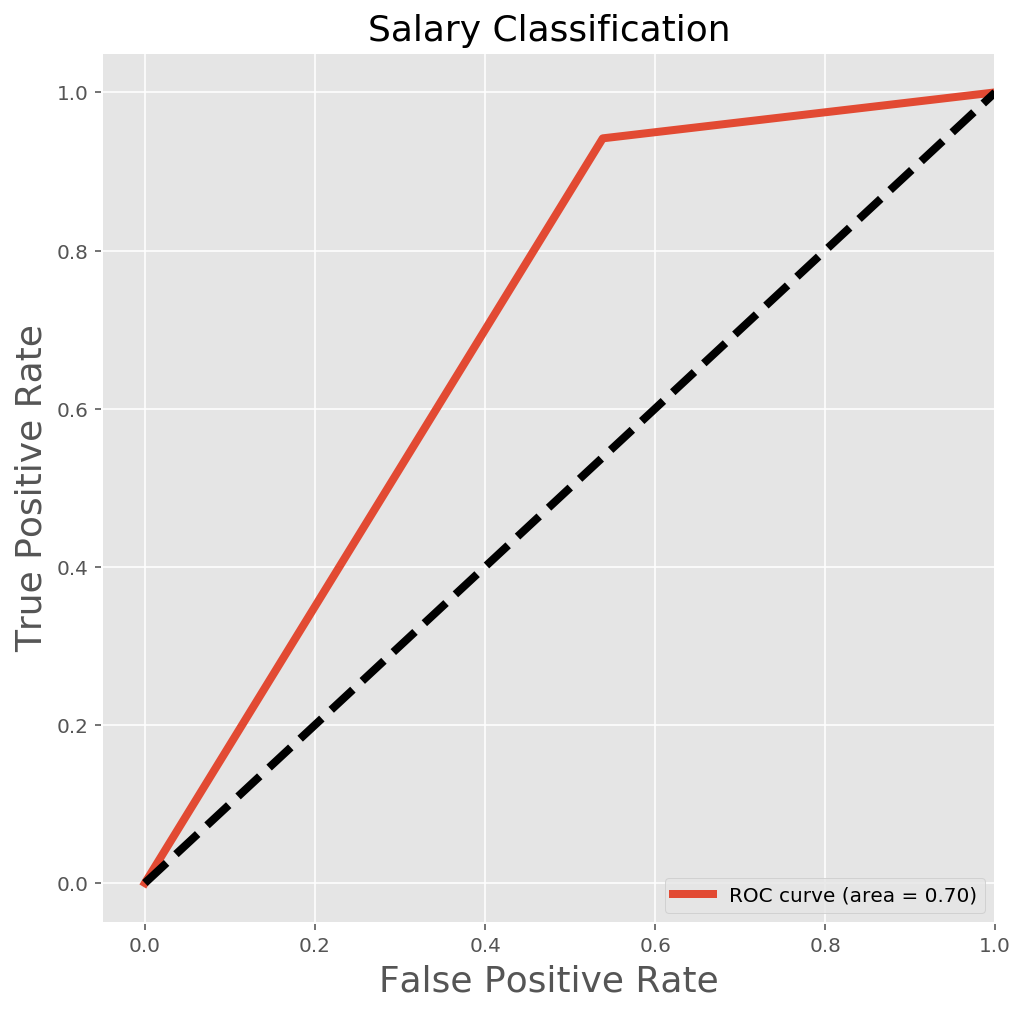

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

Plotting ROC curve for  BernoulliNB Naive Bayes


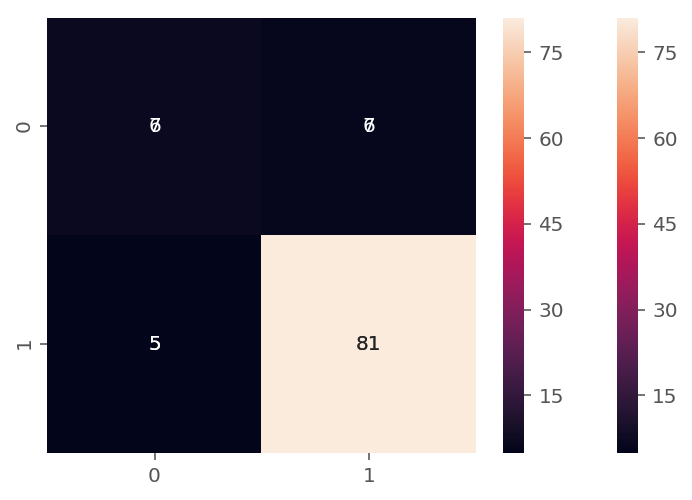

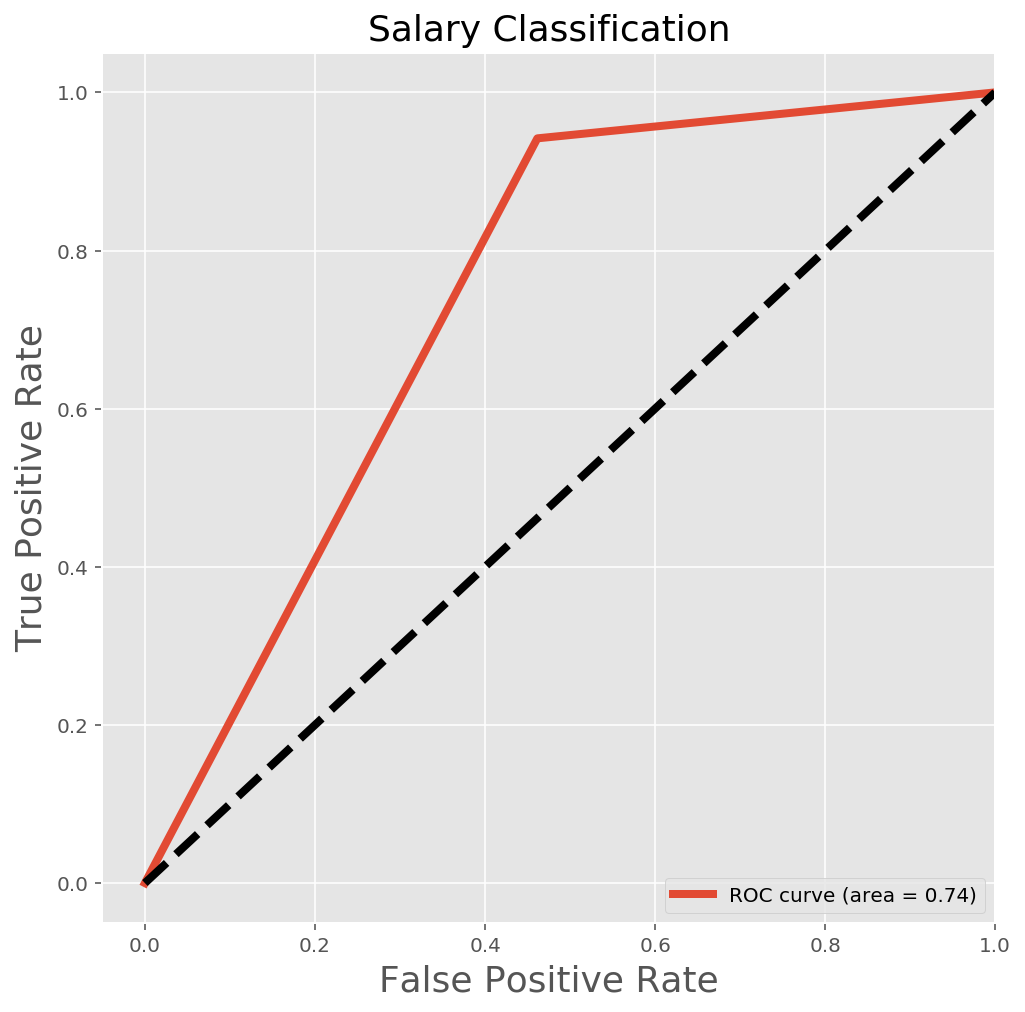

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

Plotting ROC curve for  Logistic Regression L1


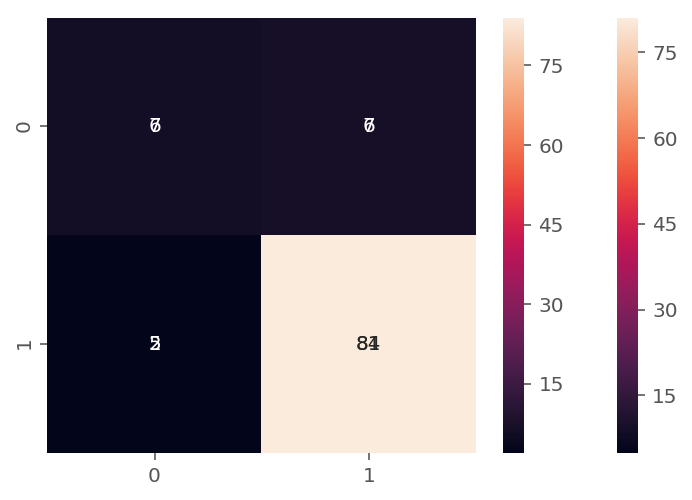

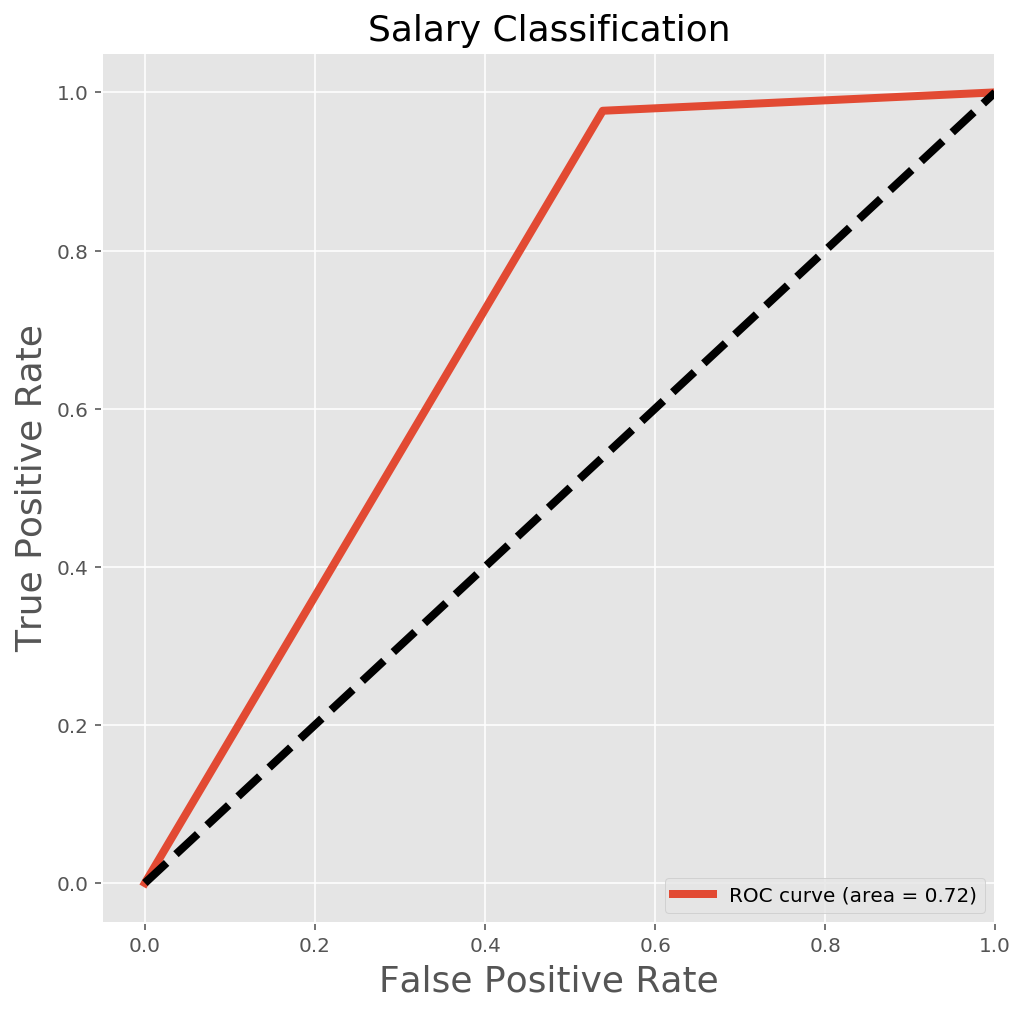

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

Plotting ROC curve for  Logistic Regression L2


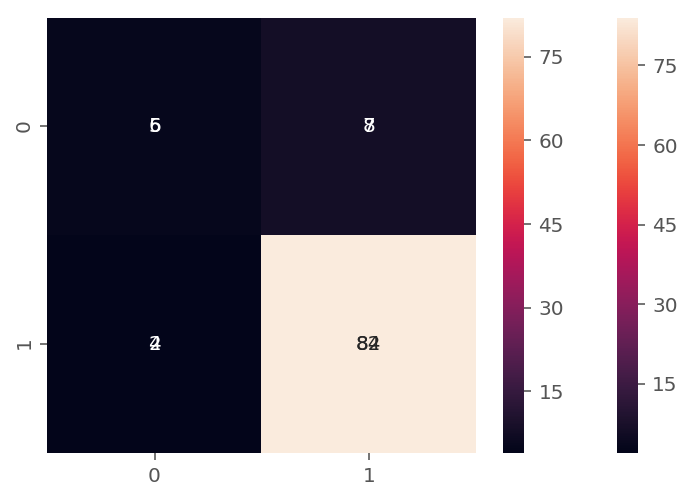

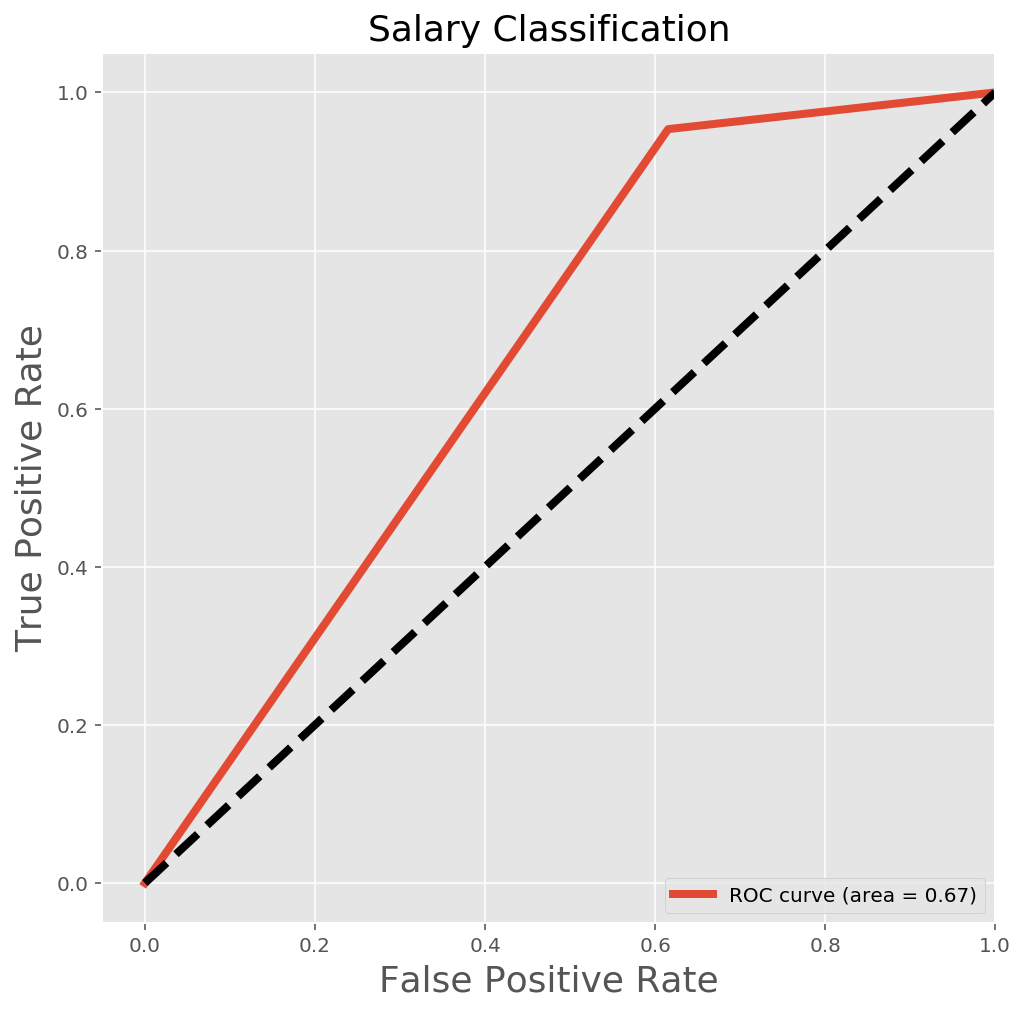

             precision    recall  f1-score   support

          0       1.00      0.08      0.14        13
          1       0.88      1.00      0.93        86

avg / total       0.89      0.88      0.83        99

             precision    recall  f1-score   support

          0       1.00      0.08      0.14        13
          1       0.88      1.00      0.93        86

avg / total       0.89      0.88      0.83        99

Plotting ROC curve for  Random Forest


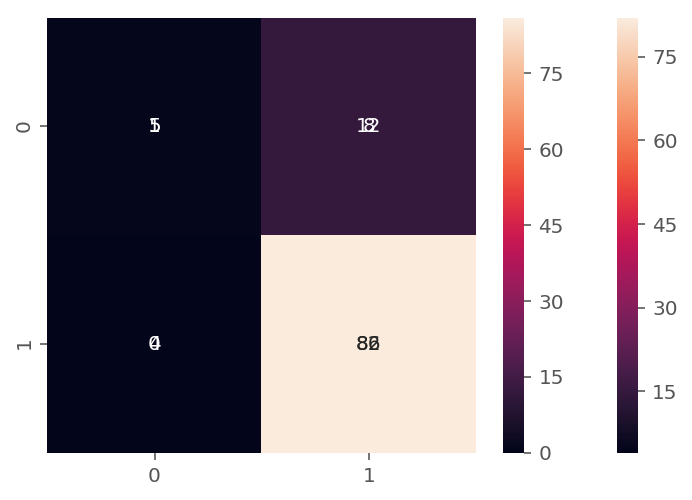

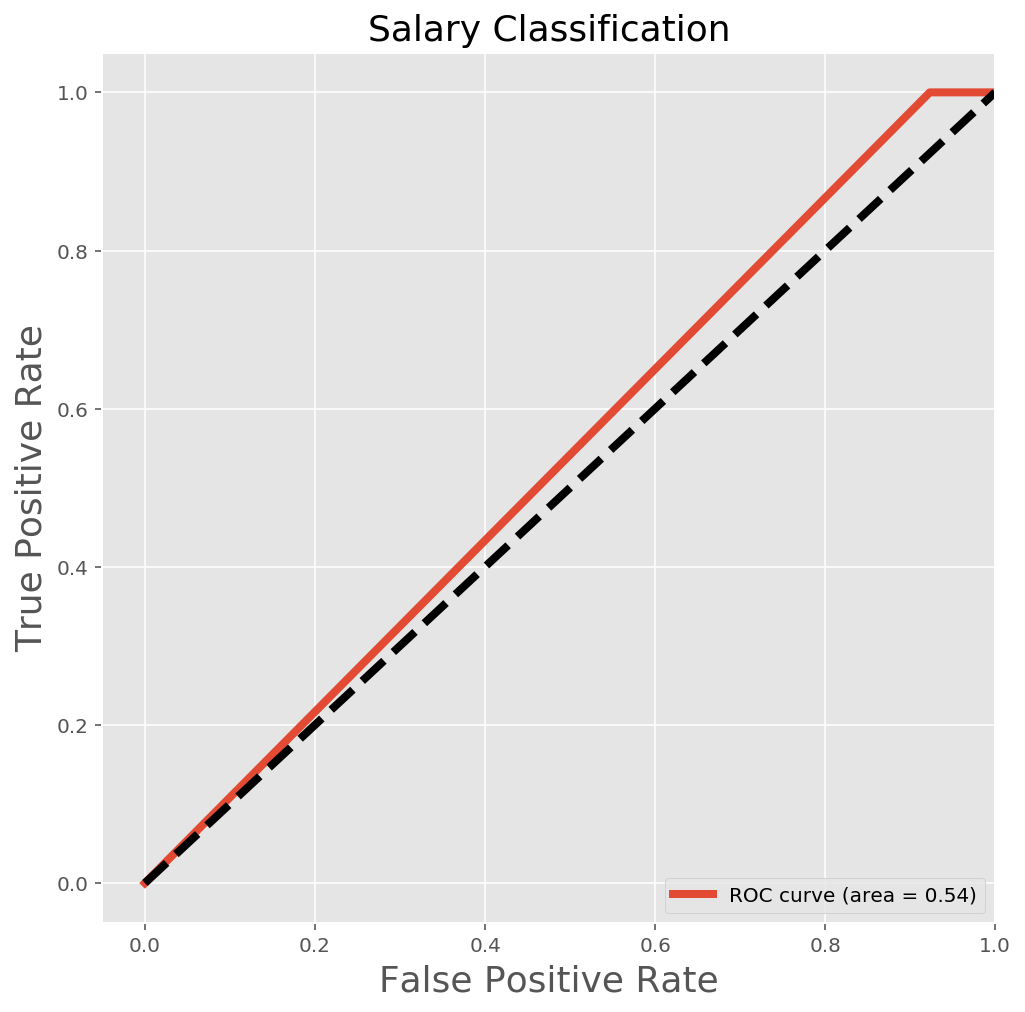

TVEC with word_max_features=1000 with ngrams of 2 - 3 words


Train      Test  Accuracy Crossval  Accuracy Score
Multinomail Naive Bayes  0.943723  0.878788           0.857169        0.878788
BernoulliNB Naive Bayes  0.965368  0.888889           0.891859        0.888889
Logistic Regression L1   1.000000  0.909091           0.904718        0.909091
Logistic Regression L2   1.000000  0.878788           0.917854        0.878788
Random Forest            1.000000  0.878788           0.870120        0.878788

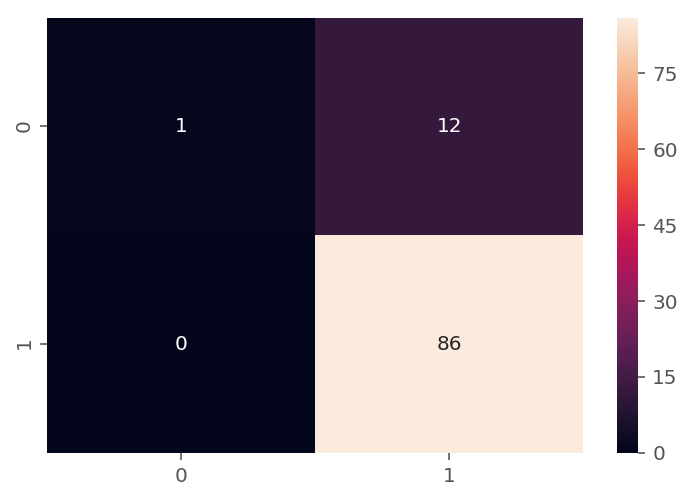

In [33]:
df = apply_models(X_train_data3, X_test_data3)
print('TVEC with word_max_features=1000 with ngrams of 2 - 3 words')
df

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.92      0.94      0.93        86

avg / total       0.87      0.88      0.87        99

Plotting ROC curve for  Multinomail Naive Bayes


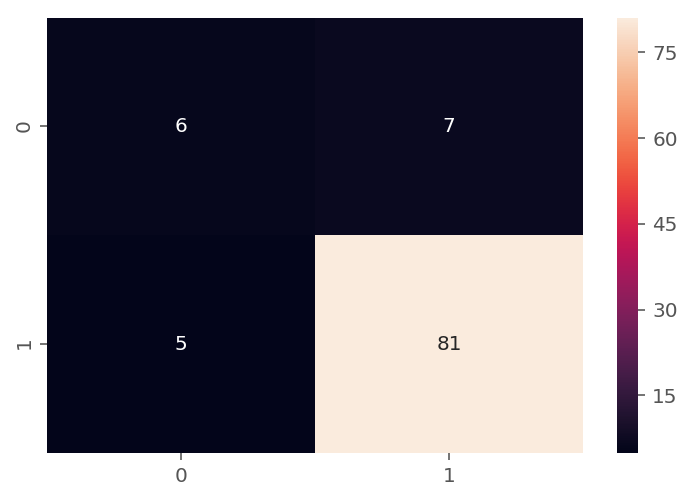

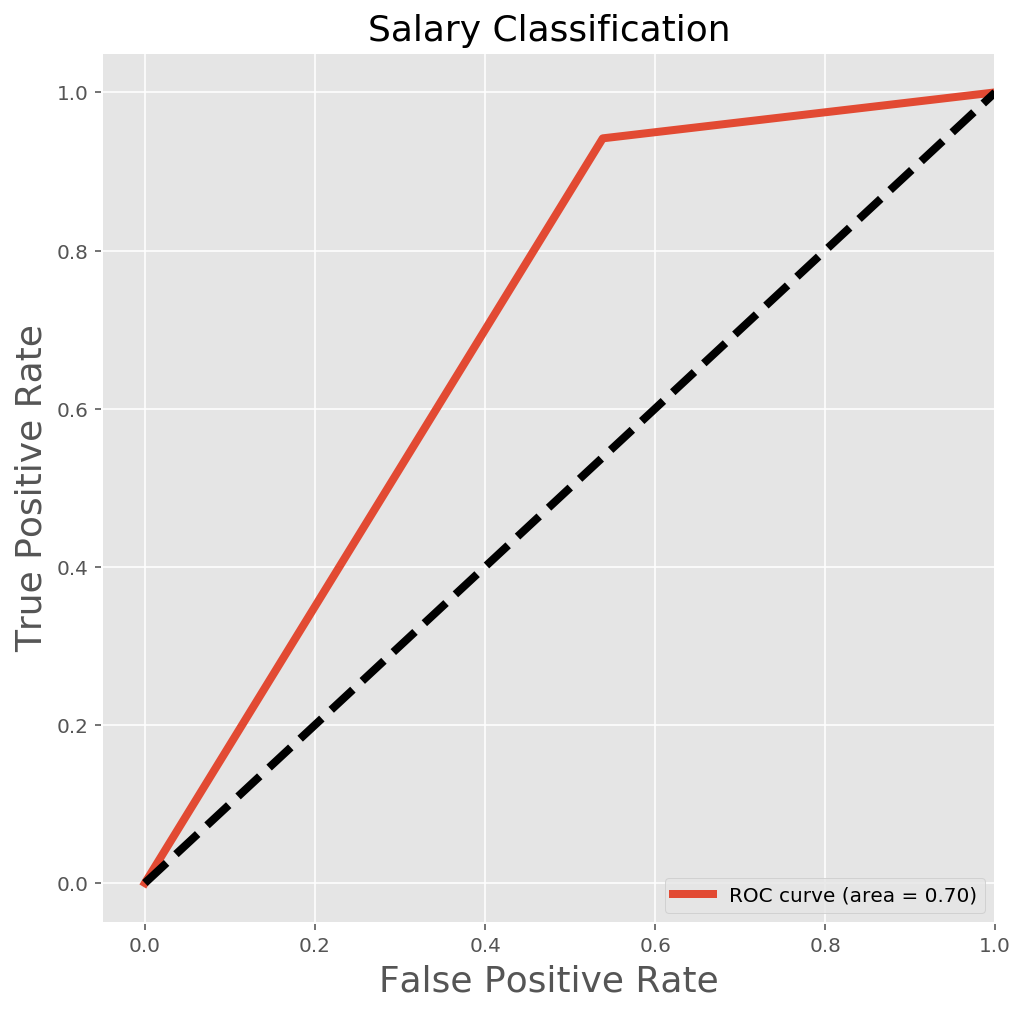

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

             precision    recall  f1-score   support

          0       0.58      0.54      0.56        13
          1       0.93      0.94      0.94        86

avg / total       0.89      0.89      0.89        99

Plotting ROC curve for  BernoulliNB Naive Bayes


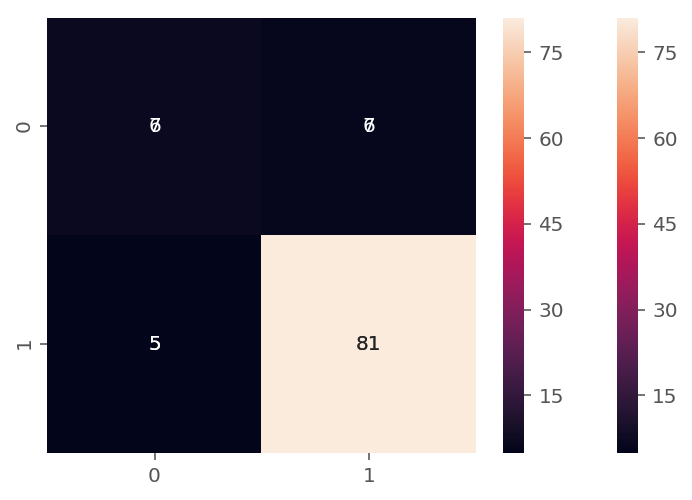

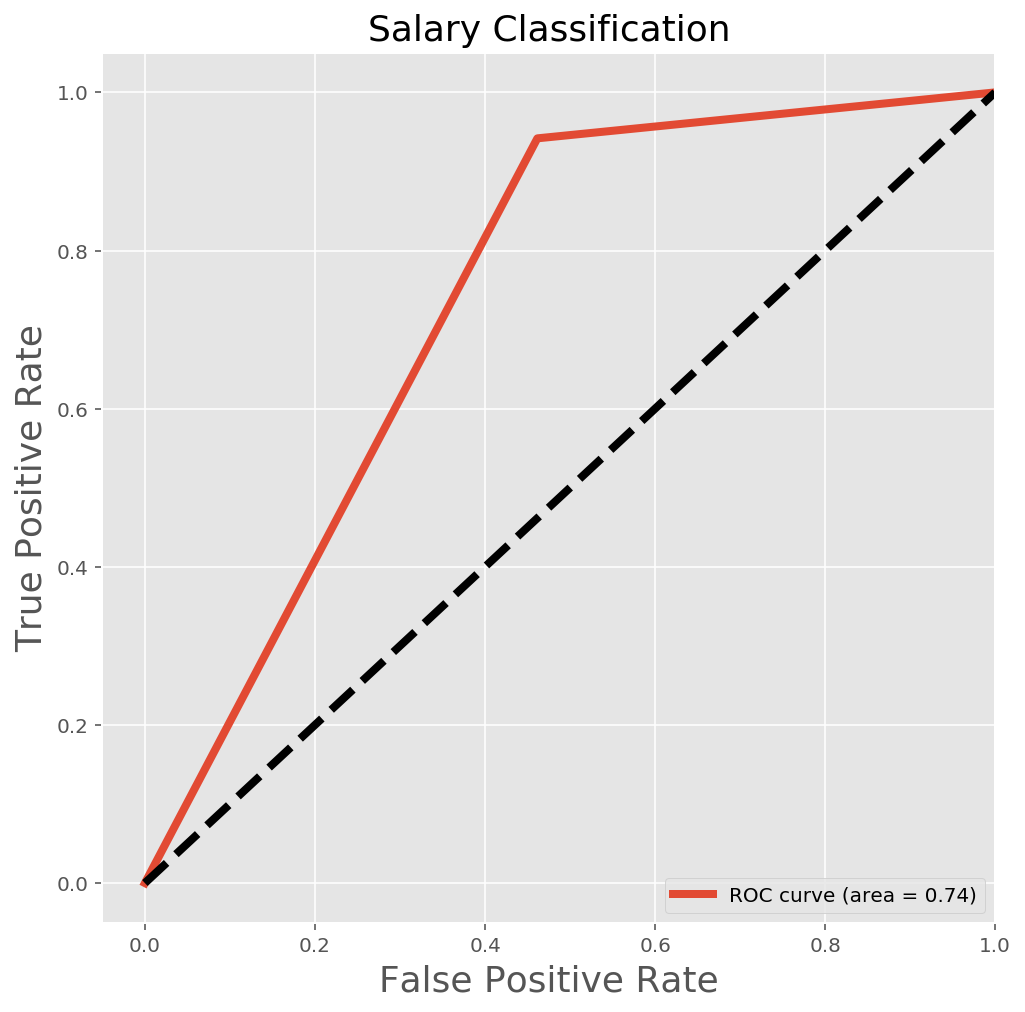

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

             precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.92      0.98      0.95        86

avg / total       0.90      0.91      0.90        99

Plotting ROC curve for  Logistic Regression L1


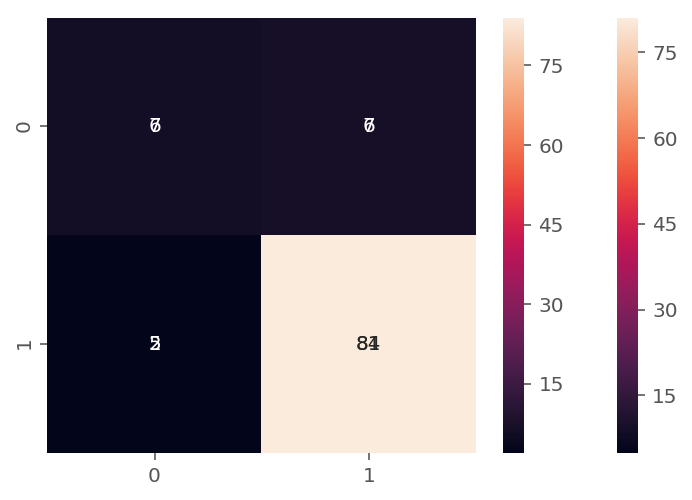

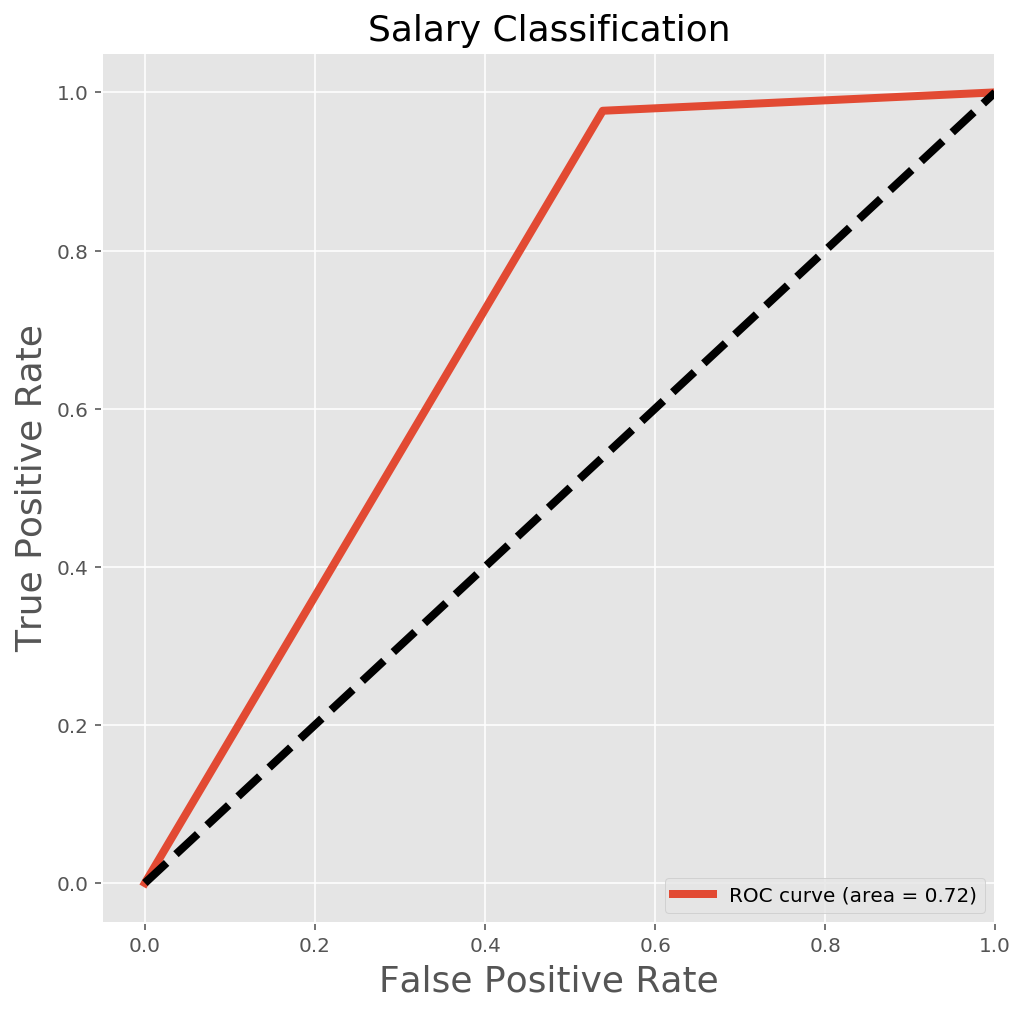

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

             precision    recall  f1-score   support

          0       0.56      0.38      0.45        13
          1       0.91      0.95      0.93        86

avg / total       0.86      0.88      0.87        99

Plotting ROC curve for  Logistic Regression L2


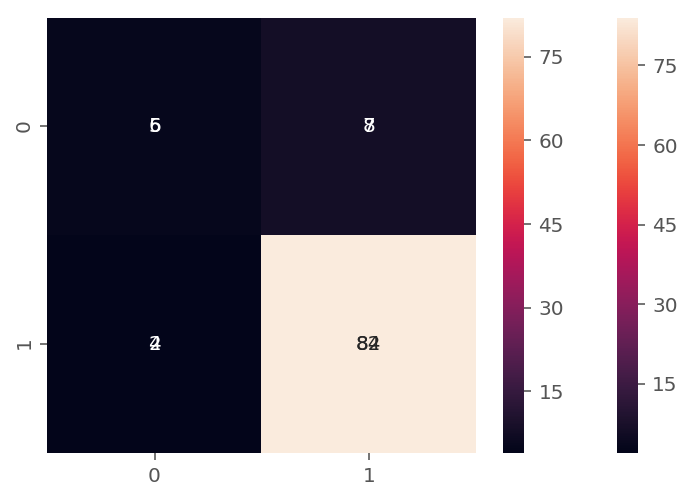

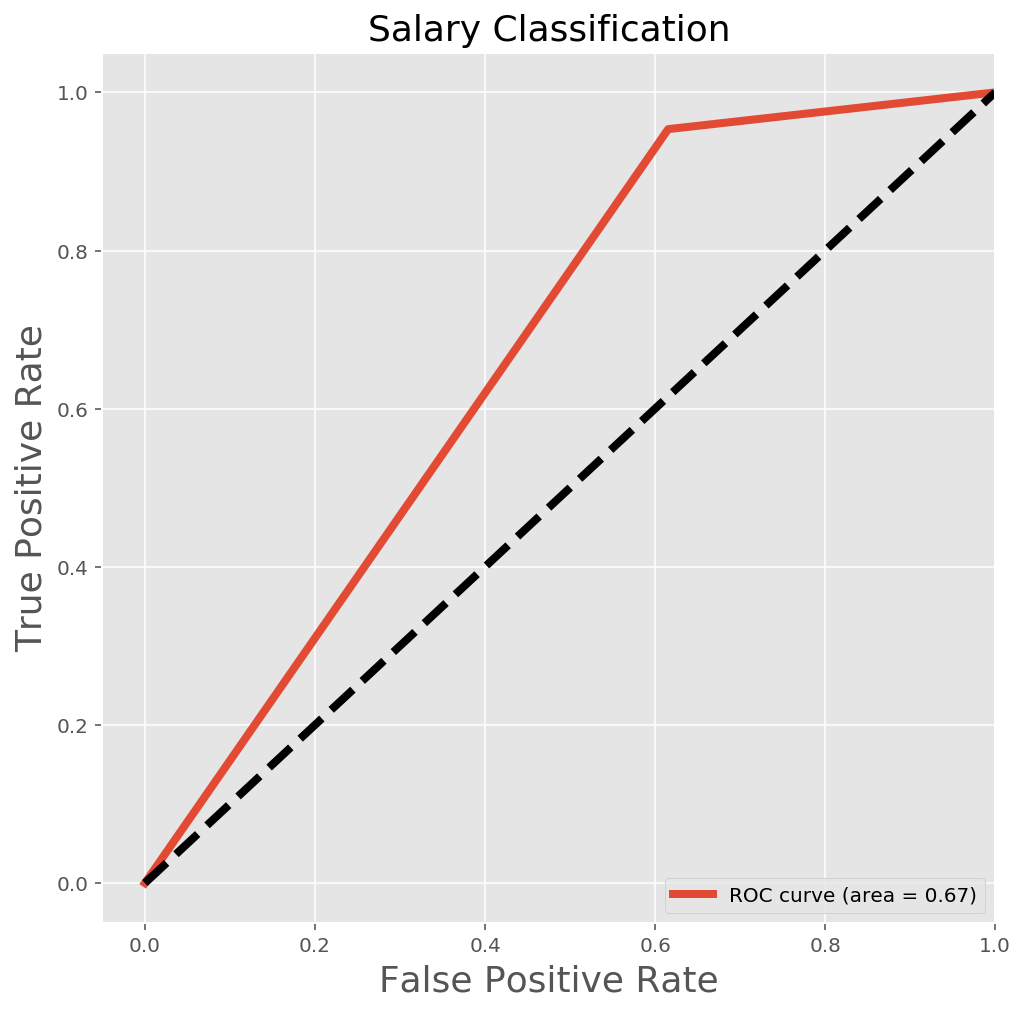

             precision    recall  f1-score   support

          0       1.00      0.08      0.14        13
          1       0.88      1.00      0.93        86

avg / total       0.89      0.88      0.83        99

             precision    recall  f1-score   support

          0       1.00      0.08      0.14        13
          1       0.88      1.00      0.93        86

avg / total       0.89      0.88      0.83        99

Plotting ROC curve for  Random Forest


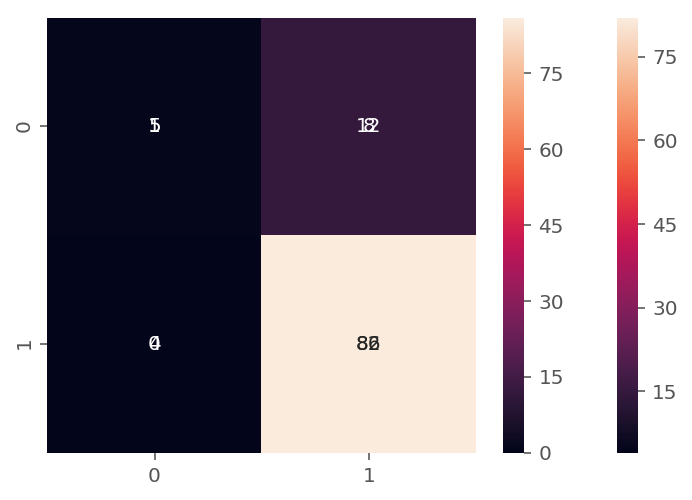

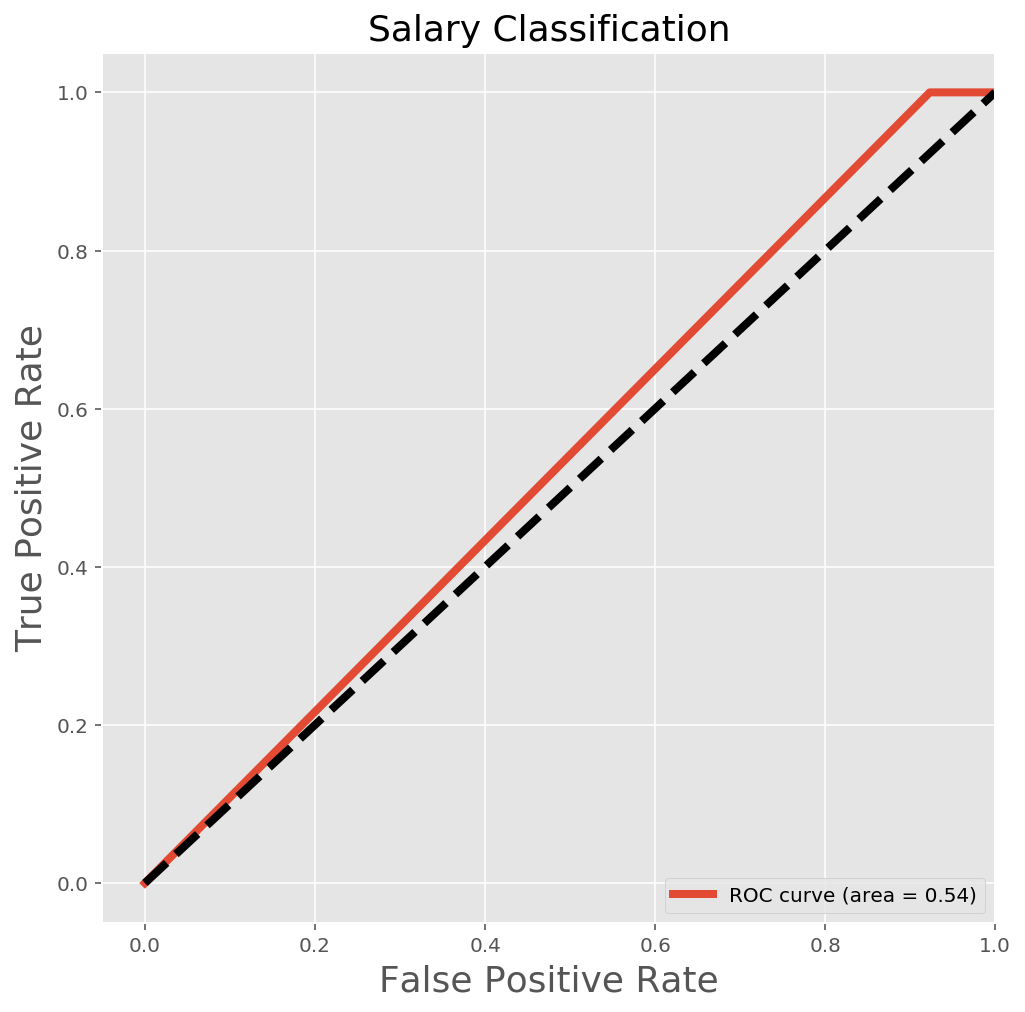

TVEC with word_max_features=200 with ngrams of 1 - 3 words


Train      Test  Accuracy Crossval  Accuracy Score
Multinomail Naive Bayes  0.943723  0.878788           0.857169        0.878788
BernoulliNB Naive Bayes  0.965368  0.888889           0.891859        0.888889
Logistic Regression L1   1.000000  0.909091           0.904718        0.909091
Logistic Regression L2   1.000000  0.878788           0.917854        0.878788
Random Forest            1.000000  0.878788           0.878816        0.878788

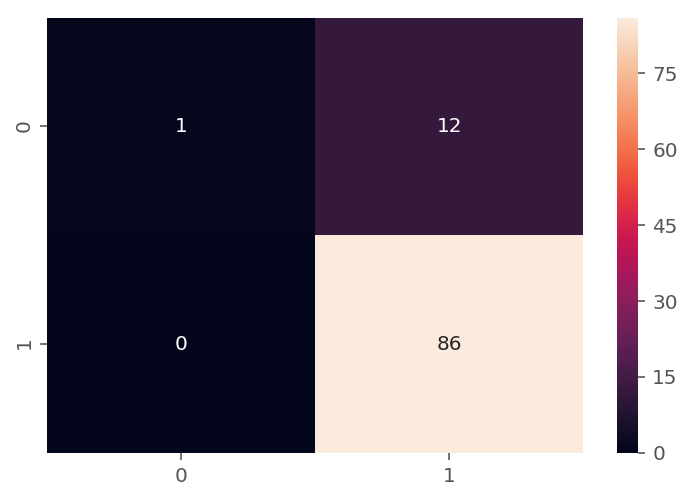

In [34]:
df = apply_models(X_train_data4, X_test_data4)
print('TVEC with word_max_features=200 with ngrams of 1 - 3 words')
df

In [35]:
dummy.head(2)

salary     title_cat  position_lvl  c_Administration & Office Support  \
4       0  Data Analyst             1                                  0   
7       0  Data Analyst             1                                  0   

   c_Advertising, Arts & Media  c_Banking & Financial Services  \
4                            0                               0   
7                            0                               0   

   c_CEO & General Management  c_Call Centre & Customer Service  \
4                           0                                 0   
7                           0                                 0   

   c_Community Services & Development  c_Construction  \
4                                   0               0   
7                                   0               0   

                         ...                          c_Sport & Recreation  \
4                        ...                                             0   
7                        ...                                             0   

   c_Trades & Services  s_NSW  s_NT  s_QLD  s_SA  s_TAS  s_VIC  s_WA  \
4                    0      0     0      0     0      0      1     0   
7                    0      0     0      1     0      0      0     0   

                                                stem  
4  We are the australian institut of famili studi...  
7  A senior data and report analyst role with a l...  

[2 rows x 38 columns]

In [36]:
value_counts = dummy['position_lvl'].value_counts()
value_counts

1    287
0     43
Name: position_lvl, dtype: int64

In [37]:
baseline = value_counts.values[0] / value_counts.sum()
baseline

0.8696969696969697

The best model is 
* CVEC with word_max_features=200 with ngrams of 1 - 3 words
* TVEC with word_max_features=200 with ngrams of 1 - 3 words
Logistic Regression L1
with 90.9% accurancy score to predict if the job title is classified as data scientist/data analyst/data engineering

Top Features that determines the job title are:
    
    *  Graduate
    *  Salary
    *  Engineering Classifications
    *  Senior